In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

# Without Treating Outliers

In [43]:
# 1.1)
df = pd.read_csv('cubic_zirconia.csv')

In [44]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [46]:
df.shape

(26967, 11)

In [47]:
# To calculate the number of null entries in the dataframe:
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [48]:
# To view the unique values in the columns with object data type:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),':', df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CUT : 5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR : 7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY : 8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




In [49]:
# To view the value counts in the columns:
for column in df.columns:
    print(column)
    print(df[column].value_counts())

Unnamed: 0
2047     1
5480     1
1322     1
3371     1
13612    1
        ..
8881     1
15026    1
12979    1
2740     1
2049     1
Name: Unnamed: 0, Length: 26967, dtype: int64
carat
0.30    1331
0.31    1118
1.01    1111
0.70     959
0.32     950
        ... 
2.65       1
1.89       1
4.50       1
1.88       1
3.51       1
Name: carat, Length: 257, dtype: int64
cut
Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: cut, dtype: int64
color
G    5661
E    4917
F    4729
H    4102
D    3344
I    2771
J    1443
Name: color, dtype: int64
clarity
SI1     6571
VS2     6099
SI2     4575
VS1     4093
VVS2    2531
VVS1    1839
IF       894
I1       365
Name: clarity, dtype: int64
depth
62.0    1131
61.9    1091
62.1    1016
61.8    1012
62.2     977
        ... 
69.2       1
55.0       1
54.6       1
54.2       1
68.6       1
Name: depth, Length: 169, dtype: int64
table
56.0    4988
57.0    4781
58.0    4258
59.0    3302
55.0    3136
        ..

In [51]:
df.describe()

,Unnamed: 0,carat,depth,table,x,y,z,price
count,26967.000000,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,13484.000000,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,7784.846691,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,1.000000,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,6742.500000,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,13484.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,20225.500000,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,26967.000000,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [52]:
df.isna().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [53]:
df = df.drop(['Unnamed: 0'], axis = 1)

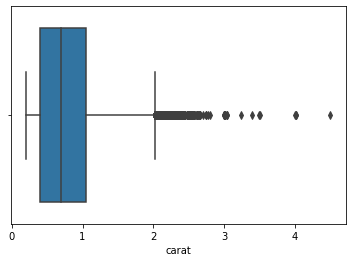

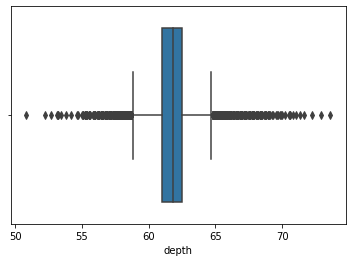

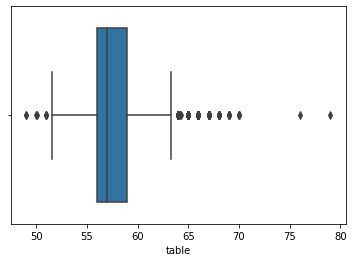

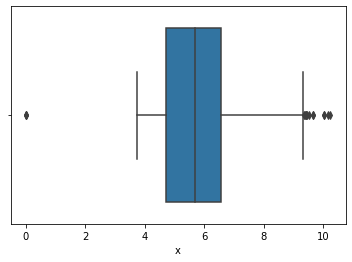

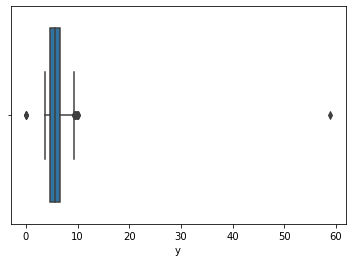

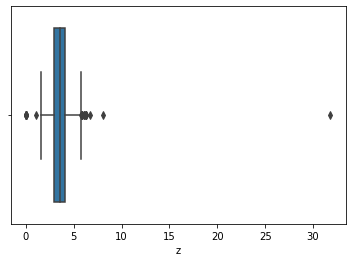

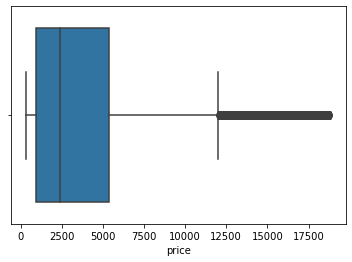

In [54]:
num_cols = ['carat','depth','table','x','y','z','price'];
for i in num_cols:
    sns.boxplot(df[i])
    plt.show()

Bivariate analysis: Distribution plot

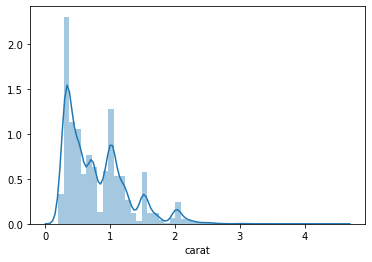

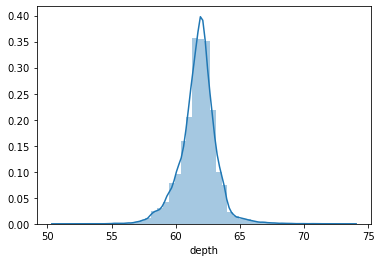

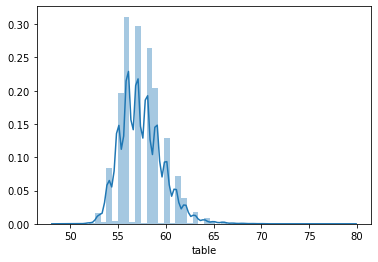

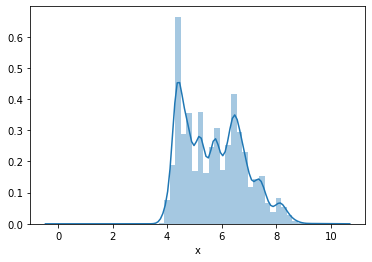

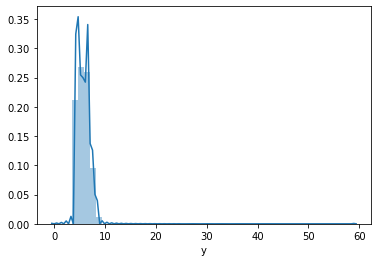

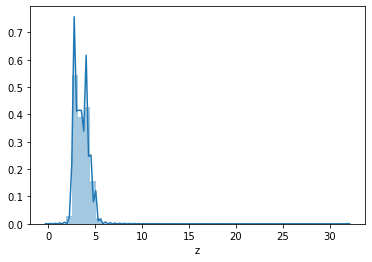

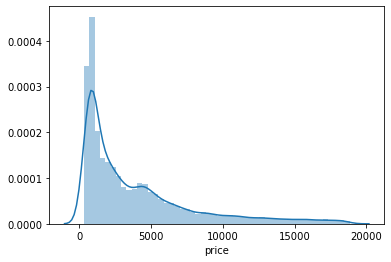

In [55]:
for i in num_cols:
    sns.distplot(df[i])
    plt.show()

Scatterplots:

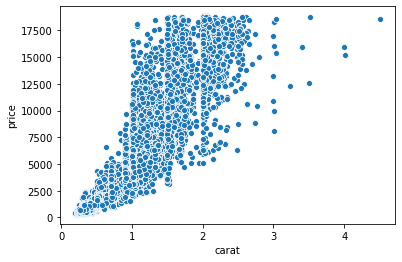

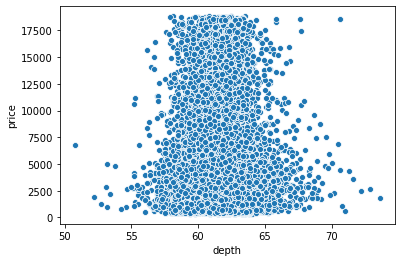

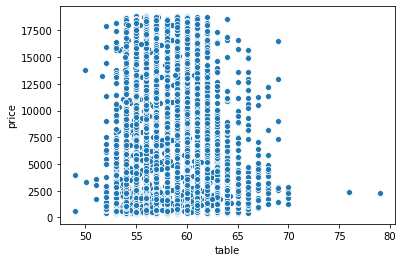

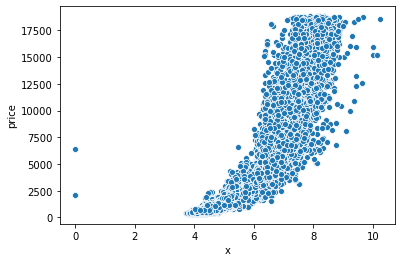

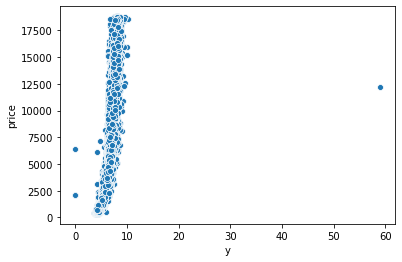

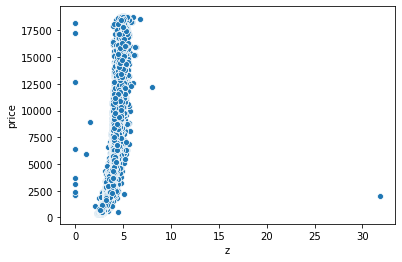

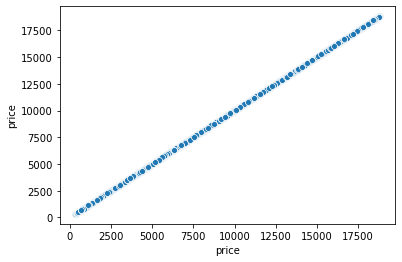

In [56]:
for i in num_cols:
    sns.scatterplot(data = df, x = (df[i]), y = 'price' )
    plt.show()

Lineplots:

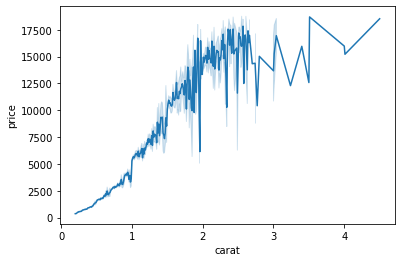

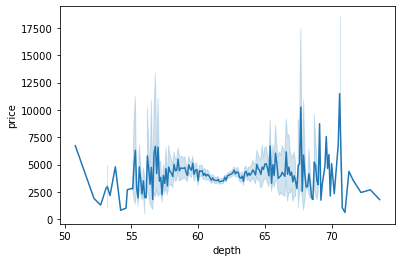

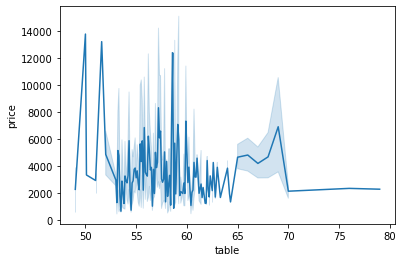

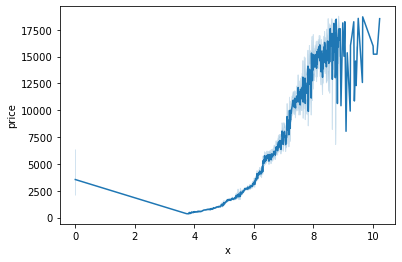

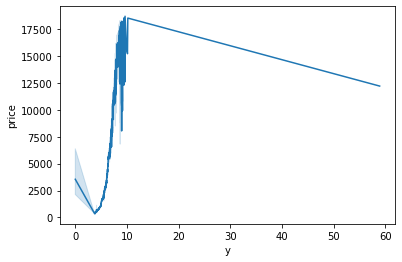

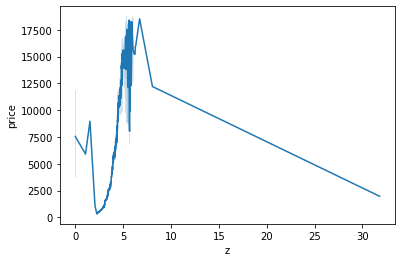

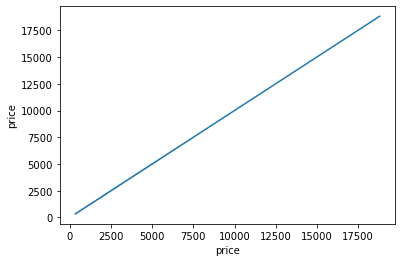

In [57]:
for i in num_cols:
    sns.lineplot(data = df, x = (df[i]), y = 'price' )
    plt.show()

Categorical Boxplot:

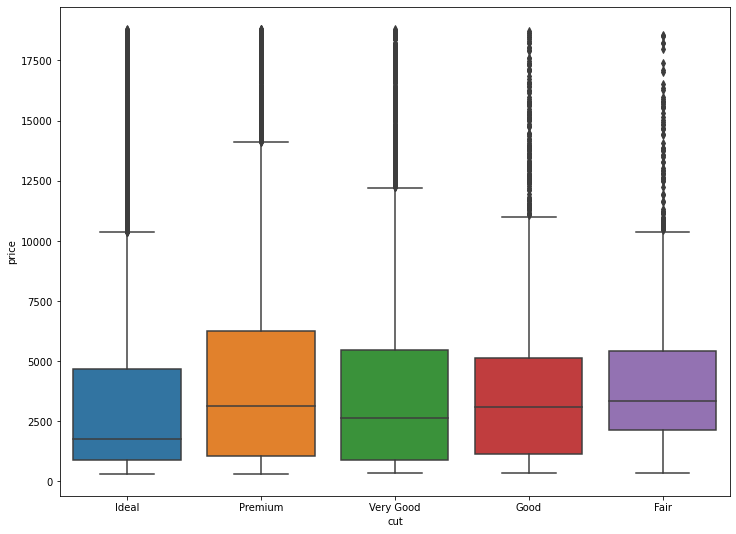

In [58]:
fig, ax = plt.subplots(figsize=(12,9))
sns.boxplot(x = 'cut', y = 'price', data = df)

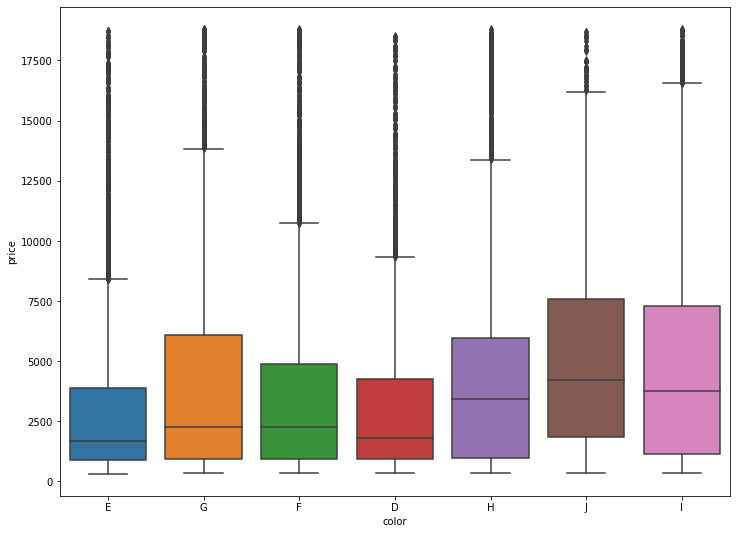

In [59]:
fig, ax = plt.subplots(figsize=(12,9))
sns.boxplot(x = 'color', y = 'price', data = df)

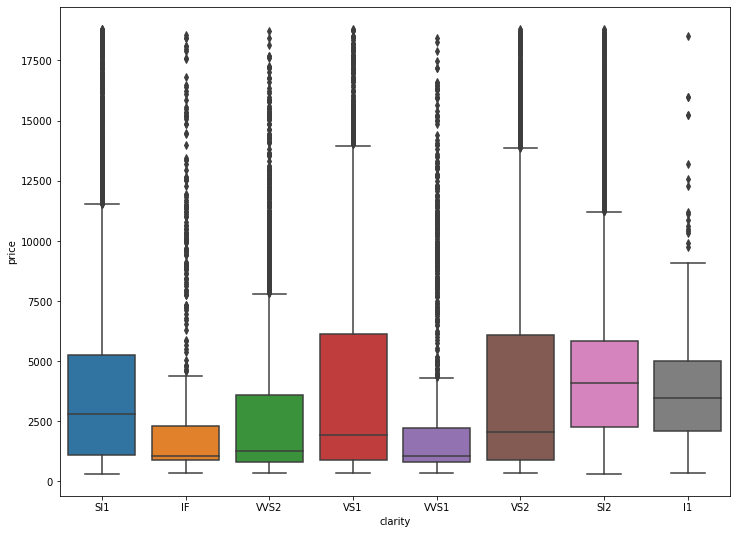

In [60]:
fig, ax = plt.subplots(figsize=(12,9))
sns.boxplot(x = 'clarity', y = 'price', data = df)

In [61]:
# 1.2)# Replacing the missing values in the depth column with the median:
df['depth'] = df['depth'].fillna(df['depth'].median())

In [62]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [63]:
# Check for 0 value:
(df.carat == 0).any()

False

In [64]:
(df.depth == 0).any()

False

In [65]:
(df.table == 0).any()

False

In [66]:
(df.x == 0).any()

True

In [67]:
df.loc[df['x'] == 0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
6215,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [68]:
df.loc[df['y'] == 0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
6215,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [69]:
df.loc[df['z'] == 0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [70]:
df.loc[df['price'] == 0]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [71]:
# it is not possible for the Length, Width and Height of the cubic zirconia to be 0 at the same time. 
# It cannot be dimensionless since it is a physical object. 
# Let us choose to drop the values:
# Help taken from: https://thispointer.com/python-pandas-how-to-drop-rows-in-dataframe-by-conditions-on-column-values/
indexnames = df[(df['x'] == 0) & (df['y'] == 0)].index
df.drop(indexnames, inplace = True)

In [72]:
df.loc[df['x'] == 0]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [73]:
# Duplicate check:
dupes = df.duplicated()
print('Number of duplicate rows is %d' % (dupes.sum()))

Number of duplicate rows is 33


In [74]:
print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Before (26964, 10)
After (26931, 10)


In [75]:
dupes = df.duplicated()
print('Number of duplicate rows is %d' % (dupes.sum()))

Number of duplicate rows is 0


Scaling does not seem to be necessary in this case as the variables x,y and z are all in mm.
The variables depth, table are values derived out of a computation with the values x,y and z.


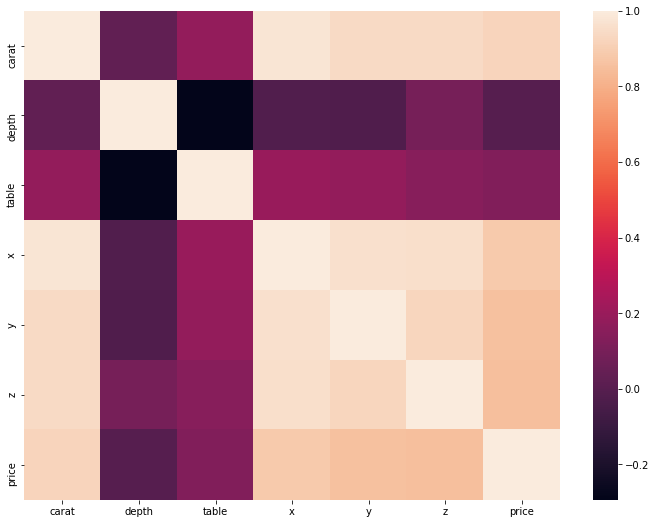

In [76]:
# Multicollinearity checks:
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(df.corr())

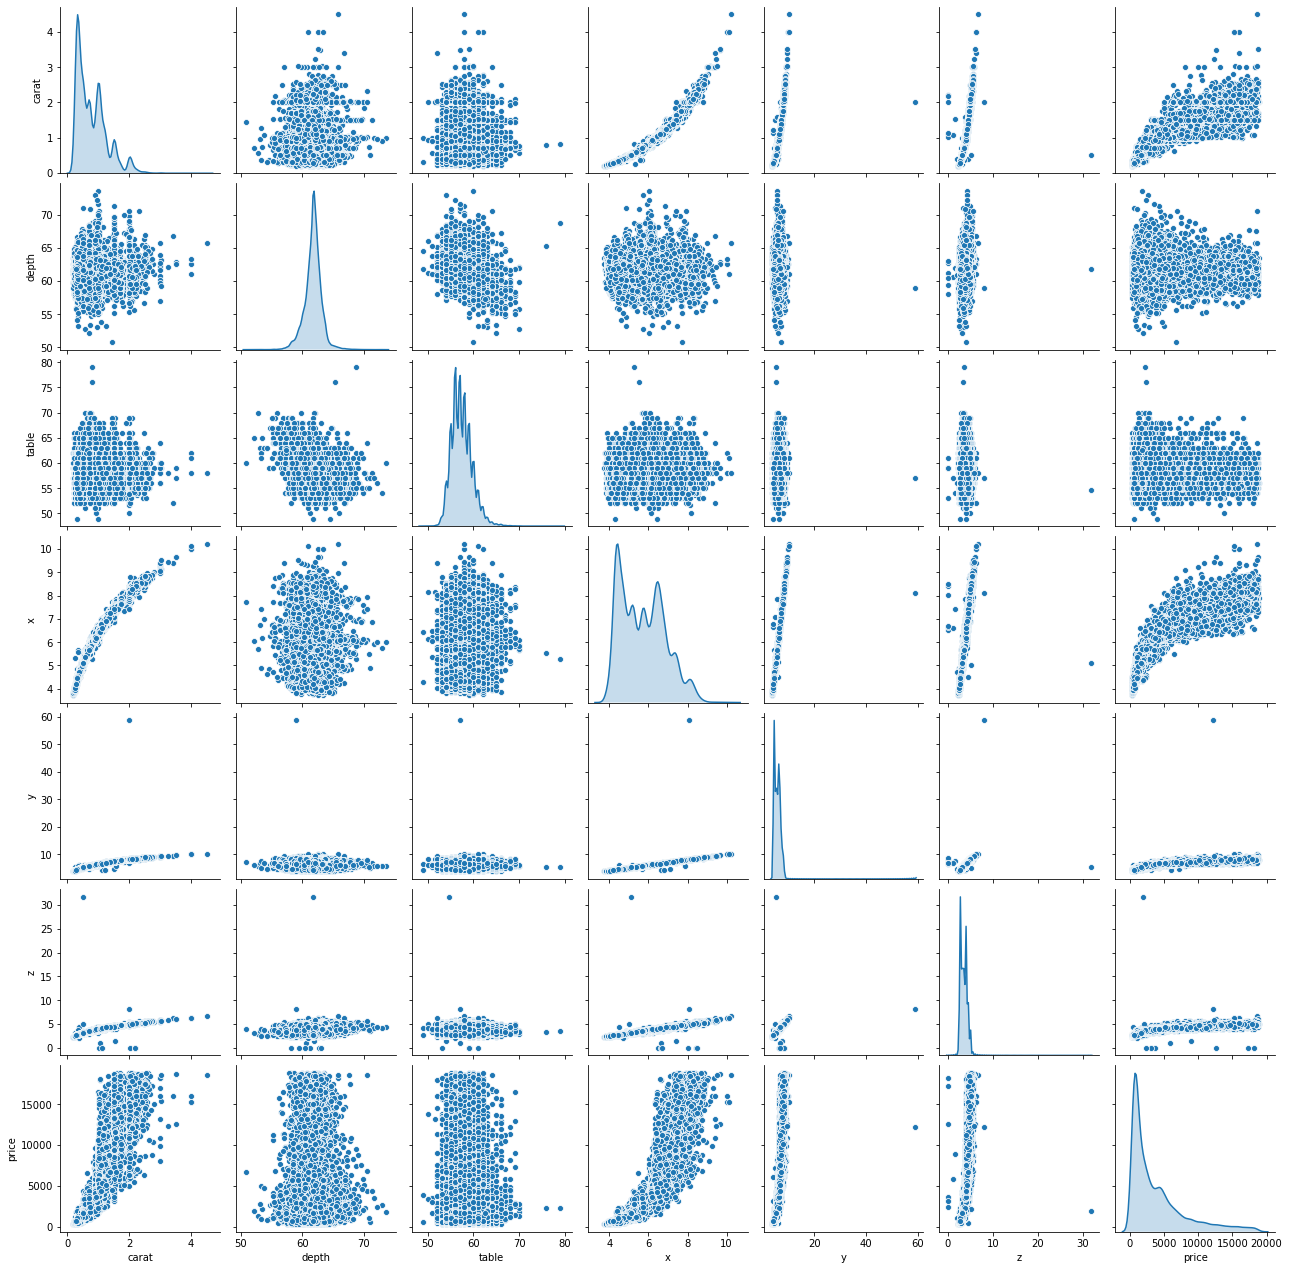

In [77]:
sns.pairplot(df, diag_kind = 'kde')

# Encoding the categorical data:

In [78]:
df['cut'] = df['cut'].replace({'Fair': 1,'Good':2,'Very Good': 3,'Premium': 4,'Ideal': 5})
df['color'] = df['color'].replace({'J': 1,'I': 2,'H': 3,'G': 4,'F': 5,'E': 6,'D': 7})
df['clarity'] = df['clarity'].replace({'IF':8,'VVS1': 7,'VVS2':6,'VS1':5,'VS2':4,'SI1':3,'SI2':2,'I1':1})

# Train-Test Split:

In [79]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,5,6,3,62.1,58.0,4.27,4.29,2.66,499
1,0.33,4,4,8,60.8,58.0,4.42,4.46,2.70,984
2,0.90,3,6,6,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,5,5,5,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,5,5,7,60.4,59.0,4.35,4.43,2.65,779


In [80]:
X = df.drop(['price'],axis=1)
y = df.pop('price')

In [81]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.30,5,6,3,62.1,58.0,4.27,4.29,2.66
1,0.33,4,4,8,60.8,58.0,4.42,4.46,2.70
2,0.90,3,6,6,62.2,60.0,6.04,6.12,3.78
3,0.42,5,5,5,61.6,56.0,4.82,4.80,2.96
4,0.31,5,5,7,60.4,59.0,4.35,4.43,2.65


In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [83]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [84]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for carat is 10967.350617743317
The coefficient for cut is 104.60062928233391
The coefficient for color is 324.87670436562564
The coefficient for clarity is 501.9550230428102
The coefficient for depth is -84.31748153173758
The coefficient for table is -30.965516863985478
The coefficient for x is -948.3747766802779
The coefficient for y is 10.323234399688754
The coefficient for z is -9.175323730074645


In [85]:
intercept = regression_model.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 3706.8605221772477


In [86]:
regression_model.score(X_train, y_train)

0.9077969375963091

In [87]:
regression_model.score(X_test, y_test)

0.910134706993905

In [88]:
# Using the Statsmodel approach:
data_train = pd.concat([X_train, y_train], axis=1)
data_test = pd.concat([X_test,y_test], axis = 1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
2275,0.30,5,6,4,61.2,55.0,4.35,4.31,2.65,844
12311,1.23,5,4,5,61.6,57.0,6.84,6.90,4.23,10859
5030,1.10,2,6,2,63.3,56.0,6.53,6.58,4.15,4065
8481,1.50,4,2,4,61.1,60.0,7.33,7.36,4.49,9471
25220,2.03,3,2,2,62.8,60.0,7.99,8.05,5.04,13063


In [89]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = data_train).fit()
lm1.params

Intercept     3706.860522
carat        10967.350618
cut            104.600629
color          324.876704
clarity        501.955023
depth          -84.317482
table          -30.965517
x             -948.374777
y               10.323234
z               -9.175324
dtype: float64

In [90]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 2.061e+04
Date:                Mon, 08 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:47:01   Log-Likelihood:            -1.6070e+05
No. Observations:               18851   AIC:                         3.214e+05
Df Residuals:                   18841   BIC:                         3.215e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3706.8605    726.744      5.101      0.0

In [91]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [92]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

1218.851920219935

In [93]:
mse_test = np.mean((lm1.predict(data_test.drop('price',axis=1))-data_test['price'])**2)

In [94]:
np.sqrt(mse_test)

1211.8221306906019

In [95]:
y_pred = lm1.predict(data_test)

In [96]:
y_pred = lm1.predict(data_test)

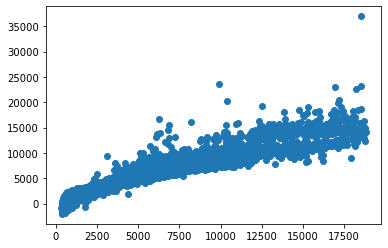

In [97]:
plt.scatter(y_test, y_pred)
plt.show()

In [98]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(3706.86) * Intercept + (10967.35) * carat + (104.6) * cut + (324.88) * color + (501.96) * clarity + (-84.32) * depth + (-30.97) * table + (-948.37) * x + (10.32) * y + (-9.18) * z + 

In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [100]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [101]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 82.23268666597293
cut ---> 14.9787884047465
color ---> 8.524583864408342
clarity ---> 8.45106542177539
depth ---> 557.9292758300684
table ---> 542.882024623414
x ---> 1111.4458620562102
y ---> 347.5352285736171
z ---> 339.13798568097775


Scaling the model:

In [104]:
from scipy.stats import zscore

In [105]:
data_train_scaled = data_train.apply(zscore)
data_test_scaled = data_test.apply(zscore)

In [106]:
import statsmodels.formula.api as smf
lm2 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = data_train_scaled).fit()
lm2.params

Intercept   -2.428613e-17
carat        1.301831e+00
cut          2.892102e-02
color        1.377896e-01
clarity      2.061900e-01
depth       -2.903596e-02
table       -1.711727e-02
x           -2.657986e-01
y            3.039805e-03
z           -1.663885e-03
dtype: float64

In [107]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                 2.061e+04
Date:                Mon, 08 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:50:56   Log-Likelihood:                -4280.3
No. Observations:               18851   AIC:                             8581.
Df Residuals:                   18841   BIC:                             8659.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.429e-17      0.002   -1.1e-14      1.0

In [108]:
# Calculate MSE
mse2 = np.mean((lm2.predict(data_train_scaled.drop('price',axis=1))-data_train_scaled['price'])**2)

In [109]:
mse2

0.09220306240369099

In [110]:
#Root Mean Squared Error - RMSE
np.sqrt(mse2)

0.303649571716627

In [111]:
mse2_test = np.mean((lm2.predict(data_test_scaled.drop('price',axis=1))-data_test_scaled['price'])**2)

In [112]:
np.sqrt(mse2_test)

0.29979920821455974

In [113]:
y_pred_scaled = lm2.predict(data_test_scaled)

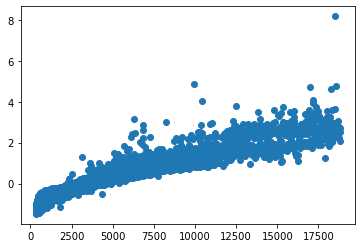

In [114]:
plt.scatter(y_test, y_pred_scaled)
plt.show()

In [115]:
for i,j in np.array(lm2.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-0.0) * Intercept + (1.3) * carat + (0.03) * cut + (0.14) * color + (0.21) * clarity + (-0.03) * depth + (-0.02) * table + (-0.27) * x + (0.0) * y + (-0.0) * z + 

# Building the model after treating outliers:

In [116]:
df2 = pd.read_csv('cubic_zirconia.csv')

In [117]:
df2 = df2.drop(['Unnamed: 0'], axis = 1)

In [118]:
df2['depth'] = df2['depth'].fillna(df2['depth'].median())

In [119]:
indexnames1 = df2[(df2['x'] == 0) & (df2['y'] == 0)].index
df2.drop(indexnames1, inplace = True)

In [120]:
df2.drop_duplicates(inplace=True) 

In [121]:
df2.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [122]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [123]:
lrcarat,urcarat = remove_outlier(df2['carat'])
df2['carat'] = np.where(df2['carat']>urcarat,urcarat,df2['carat'])
df2['carat'] = np.where(df2['carat']<lrcarat,lrcarat,df2['carat'])

In [124]:
lrdepth,urdepth = remove_outlier(df2['depth'])
df2['depth'] = np.where(df2['depth']>urdepth,urdepth,df2['depth'])
df2['depth'] = np.where(df2['depth']<lrdepth,lrdepth,df2['depth'])

In [125]:
lrtable,urtable = remove_outlier(df2['table'])
df2['table'] = np.where(df2['table']>urtable,urtable,df2['table'])
df2['table'] = np.where(df2['table']<lrtable,lrtable,df2['table'])

In [126]:
lrx,urx = remove_outlier(df2['x'])
df2['x'] = np.where(df2['x']>urx,urx,df2['x'])
df2['x'] = np.where(df2['x']<lrx,lrx,df2['x'])

In [127]:
lry,ury = remove_outlier(df2['y'])
df2['y'] = np.where(df2['y']>ury,ury,df2['y'])
df2['y'] = np.where(df2['y']<lry,lry,df2['y'])

In [128]:
lrz,urz = remove_outlier(df2['z'])
df2['z'] = np.where(df2['z']>urz,urz,df2['z'])
df2['z'] = np.where(df2['z']<lrz,lrz,df2['z'])

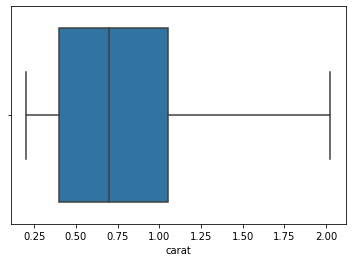

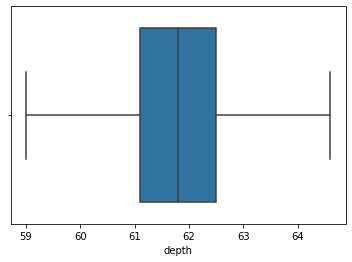

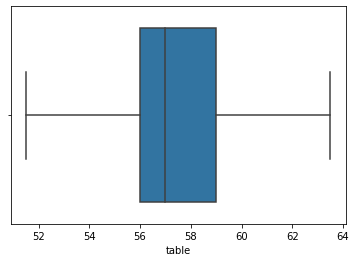

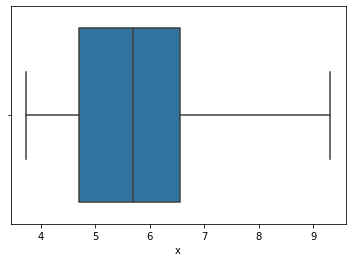

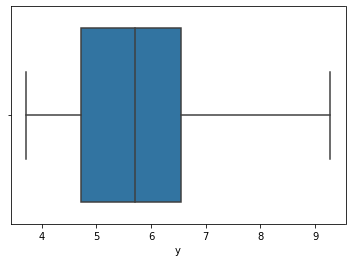

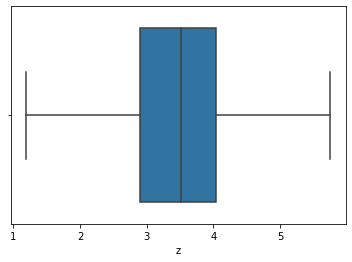

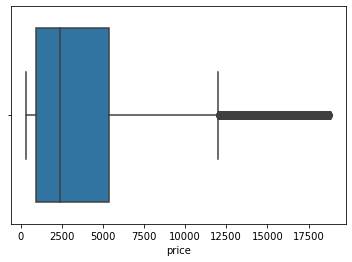

In [129]:
num_cols = ['carat','depth','table','x','y','z','price'];
for i in num_cols:
    sns.boxplot(df2[i])
    plt.show()

In [130]:
df2['cut'] = df2['cut'].replace({'Fair': 1,'Good':2,'Very Good': 3,'Premium': 4,'Ideal': 5})
df2['color'] = df2['color'].replace({'J': 1,'I': 2,'H': 3,'G': 4,'F': 5,'E': 6,'D': 7})
df2['clarity'] = df2['clarity'].replace({'IF':8,'VVS1': 7,'VVS2':6,'VS1':5,'VS2':4,'SI1':3,'SI2':2,'I1':1})

In [131]:
X = df2.drop(['price'],axis=1)
y = df2.pop('price')

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [135]:
data_train1 = pd.concat([X_train,y_train], axis = 1)
data_test1 = pd.concat([X_test,y_test], axis = 1)

In [136]:
from scipy.stats import zscore

In [137]:
data_train_scaled1 = data_train1.apply(zscore)
data_test_scaled1 = data_test1.apply(zscore)

In [138]:
import statsmodels.formula.api as smf
lm4 = smf.ols(formula= 'price ~ carat+cut+color+clarity+depth+table+x+y+z', data = data_train_scaled1).fit()
lm4.params

Intercept   -2.428613e-17
carat        1.573610e+00
cut          3.469811e-02
color        1.375945e-01
clarity      1.974287e-01
depth       -2.434267e-02
table       -1.598968e-02
x           -7.563430e-01
y            3.184891e-01
z           -1.038106e-01
dtype: float64

In [139]:
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                 2.302e+04
Date:                Tue, 09 Mar 2021   Prob (F-statistic):               0.00
Time:                        00:00:45   Log-Likelihood:                -3328.8
No. Observations:               18851   AIC:                             6678.
Df Residuals:                   18841   BIC:                             6756.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.429e-17      0.002  -1.15e-14      1.0

In [140]:
# Calculate MSE
mse = np.mean((lm4.predict(data_train_scaled1.drop('price',axis=1))-data_train_scaled1['price'])**2)

In [141]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

0.2887042988840051

In [142]:
mse_test = np.mean((lm4.predict(data_test_scaled1.drop('price',axis=1))-data_test_scaled1['price'])**2)

In [143]:
np.sqrt(mse_test)

0.28723071192252175

In [144]:
y_pred = lm4.predict(data_test_scaled1)

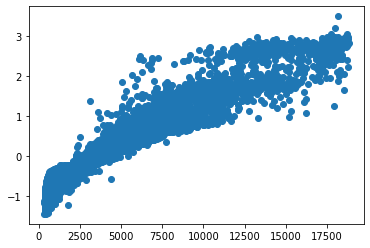

In [145]:
plt.scatter(y_test, y_pred)
plt.show()

In [146]:
for i,j in np.array(lm4.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-0.0) * Intercept + (1.57) * carat + (0.03) * cut + (0.14) * color + (0.2) * clarity + (-0.02) * depth + (-0.02) * table + (-0.76) * x + (0.32) * y + (-0.1) * z + 

In [147]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [148]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [149]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 116.38382464793797
cut ---> 16.457980434724078
color ---> 8.529970978657355
clarity ---> 8.617953838787466
depth ---> 982.6721732416743
table ---> 755.050113619987
x ---> 10300.294623615488
y ---> 9333.225902349615
z ---> 1994.7121696293877


# Binning continous variables:

In [150]:
df3 = pd.read_csv('cubic_zirconia.csv')

In [151]:
df3['depth'] = df3['depth'].fillna(df3['depth'].median())

In [152]:
indexnames1 = df3[(df3['x'] == 0) & (df3['y'] == 0)].index
df3.drop(indexnames1, inplace = True)

In [153]:
df3.drop_duplicates(inplace=True) 

In [154]:
df3.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [155]:
df3['x'] = pd.cut(df3['x'], 6)

In [156]:
df3['y'] = pd.cut(df3['y'], 6)

In [157]:
df3['carat'] = pd.cut(df3['carat'], 6)

In [158]:
df3['price'] = pd.cut(df3['price'], 8)

In [159]:
df3.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,"(0.196, 0.917]",Ideal,E,SI1,62.1,58.0,"(3.724, 4.813]","(3.655, 12.908]",2.66,"(307.508, 2637.5]"
1,2,"(0.196, 0.917]",Premium,G,IF,60.8,58.0,"(3.724, 4.813]","(3.655, 12.908]",2.70,"(307.508, 2637.5]"
2,3,"(0.196, 0.917]",Very Good,E,VVS2,62.2,60.0,"(5.897, 6.98]","(3.655, 12.908]",3.78,"(4949.0, 7260.5]"
3,4,"(0.196, 0.917]",Ideal,F,VS1,61.6,56.0,"(4.813, 5.897]","(3.655, 12.908]",2.96,"(307.508, 2637.5]"
4,5,"(0.196, 0.917]",Ideal,F,VVS1,60.4,59.0,"(3.724, 4.813]","(3.655, 12.908]",2.65,"(307.508, 2637.5]"
5,6,"(0.917, 1.633]",Ideal,D,VS2,61.5,56.0,"(5.897, 6.98]","(3.655, 12.908]",3.99,"(7260.5, 9572.0]"
6,7,"(0.917, 1.633]",Good,H,SI1,63.7,60.0,"(5.897, 6.98]","(3.655, 12.908]",4.03,"(2637.5, 4949.0]"
7,8,"(0.196, 0.917]",Premium,E,SI1,61.5,62.0,"(4.813, 5.897]","(3.655, 12.908]",3.12,"(307.508, 2637.5]"
8,9,"(0.917, 1.633]",Good,H,SI1,63.8,64.0,"(5.897, 6.98]","(3.655, 12.908]",4.26,"(4949.0, 7260.5]"
9,10,"(0.196, 0.917]",Ideal,F,VS2,60.5,57.0,"(3.724, 4.813]","(3.655, 12.908]",2.76,"(307.508, 2637.5]"


In [160]:
df3.carat.value_counts()

(0.196, 0.917]    17094
(0.917, 1.633]     8286
(1.633, 2.35]      1467
(2.35, 3.067]       109
(3.783, 4.5]          4
(3.067, 3.783]        4
Name: carat, dtype: int64

In [161]:
ins = pd.crosstab([df3.carat,df3.color], df3.price, margins = True)

In [162]:
ins

price                 (307.508, 2637.5]  (2637.5, 4949.0]  (4949.0, 7260.5]  \
carat          color                                                          
(0.196, 0.917] D                   2031               471                27   
               E                   3073               666                24   
               F                   2606               584                17   
               G                   3057               507                16   
               H                   1824               327                 6   
               I                   1116               187                 0   
               J                    503                44                 0   
(0.917, 1.633] D                      0               183               286   
               E                      1               309               348   
               F                      8               371               431   
               G                     14               370               668   
               H                      9               540               604   
               I                     15               382               370   
               J                      9               267               216   
(1.633, 2.35]  D                      0                 0                 0   
               E                      0                 0                 2   
               F                      0                 0                 7   
               G                      0                 0                 9   
               H                      0                 1                16   
               I                      0                 0                 6   
               J                      0                 0                10   
(2.35, 3.067]  D                      0                 0                 0   
               E                      0                 0                 0   
               F                      0                 0                 0   
               G                      0                 0                 0   
               H                      0                 0                 0   
               I                      0                 0                 0   
               J                      0                 0                 1   
(3.067, 3.783] D                      0                 0                 0   
               H                      0                 0                 0   
               J                      0                 0                 0   
(3.783, 4.5]   I                      0                 0                 0   
               J                      0                 0                 0   
All                               14266              5209              3064   

price                 (7260.5, 9572.0]  (9572.0, 11883.5]  (11883.5, 14195.0]  \
carat          color                                                            
(0.196, 0.917] D                     5                  0                   0   
               E                     2                  1                   0   
               F                     0                  0                   0   
               G                     0                  0                   0   
               H                     0                  0                   0   
               I                     0                  0                   0   
               J                     0                  0                   0   
(0.917, 1.633] D                   110                 78                  49   
               E                   159                115                  69   
               F                   260                168                  82   
               G                   426                196                 121   
               H                   219                147                  39   
               I     

In [163]:
df_new = pd.crosstab([df3.x],df3.price, margins = True)
df_new


price,"(307.508, 2637.5]","(2637.5, 4949.0]","(4949.0, 7260.5]","(7260.5, 9572.0]","(9572.0, 11883.5]","(11883.5, 14195.0]","(14195.0, 16506.5]","(16506.5, 18818.0]",All
x,,,,,,,,,
"(3.724, 4.813]",8106,0,0,0,0,0,0,0,8106
"(4.813, 5.897]",5889,1360,7,0,0,0,0,0,7256
"(5.897, 6.98]",271,3785,2610,835,280,60,24,4,7869
"(6.98, 8.063]",0,64,436,718,706,469,324,166,2883
"(8.063, 9.147]",0,0,11,17,52,205,243,307,835
"(9.147, 10.23]",0,0,0,0,2,3,5,5,15
All,14266,5209,3064,1570,1040,737,596,482,26964


In [164]:
pd.crosstab(index=[df3['y']], columns=[df3['price']], margins = False)

price,"(307.508, 2637.5]","(2637.5, 4949.0]","(4949.0, 7260.5]","(7260.5, 9572.0]","(9572.0, 11883.5]","(11883.5, 14195.0]","(14195.0, 16506.5]","(16506.5, 18818.0]"
y,,,,,,,,
"(3.655, 12.908]",14266,5209,3064,1570,1040,736,596,482
"(49.702, 58.9]",0,0,0,0,0,1,0,0


In [165]:
pd.crosstab(index=[df3['y']], columns=[df3['price']], margins = False)

price,"(307.508, 2637.5]","(2637.5, 4949.0]","(4949.0, 7260.5]","(7260.5, 9572.0]","(9572.0, 11883.5]","(11883.5, 14195.0]","(14195.0, 16506.5]","(16506.5, 18818.0]"
y,,,,,,,,
"(3.655, 12.908]",14266,5209,3064,1570,1040,736,596,482
"(49.702, 58.9]",0,0,0,0,0,1,0,0


In [166]:
pd.crosstab([df3.carat],df3.price, margins = True)

price,"(307.508, 2637.5]","(2637.5, 4949.0]","(4949.0, 7260.5]","(7260.5, 9572.0]","(9572.0, 11883.5]","(11883.5, 14195.0]","(14195.0, 16506.5]","(16506.5, 18818.0]",All
carat,,,,,,,,,
"(0.196, 0.917]",14210,2786,90,7,1,0,0,0,17094
"(0.917, 1.633]",56,2422,2923,1463,811,363,195,53,8286
"(1.633, 2.35]",0,1,50,97,223,361,367,368,1467
"(2.35, 3.067]",0,0,1,3,5,11,30,59,109
"(3.067, 3.783]",0,0,0,0,0,2,1,1,4
"(3.783, 4.5]",0,0,0,0,0,0,3,1,4
All,14266,5209,3064,1570,1040,737,596,482,26964


In [167]:
pd.crosstab([df3.color],df3.price, margins = True)

price,"(307.508, 2637.5]","(2637.5, 4949.0]","(4949.0, 7260.5]","(7260.5, 9572.0]","(9572.0, 11883.5]","(11883.5, 14195.0]","(14195.0, 16506.5]","(16506.5, 18818.0]",All
color,,,,,,,,,
D,2031,654,313,115,90,64,44,33,3344
E,3074,975,374,164,125,83,76,46,4917
F,2614,955,455,267,180,107,80,69,4727
G,3071,877,693,432,216,162,121,88,5660
H,1833,868,626,238,205,127,96,109,4102
I,1131,569,376,204,171,88,129,103,2771
J,512,311,227,150,53,106,50,34,1443
All,14266,5209,3064,1570,1040,737,596,482,26964


In [168]:
pd.crosstab([df3.carat,df3.cut], df3.price, margins = True)

price                     (307.508, 2637.5]  (2637.5, 4949.0]  \
carat          cut                                              
(0.196, 0.917] Fair                     248                89   
               Good                    1109               318   
               Ideal                   6690              1084   
               Premium                 3151               539   
               Very Good               3012               756   
(0.917, 1.633] Fair                      29               195   
               Good                       4               368   
               Ideal                      5               505   
               Premium                   15               814   
               Very Good                  3               540   
(1.633, 2.35]  Fair                       0                 0   
               Good                       0                 0   
               Ideal                      0                 0   
               Premium                    0                 0   
               Very Good                  0                 1   
(2.35, 3.067]  Fair                       0                 0   
               Good                       0                 0   
               Ideal                      0                 0   
               Premium                    0                 0   
               Very Good                  0                 0   
(3.067, 3.783] Fair                       0                 0   
               Ideal                      0                 0   
               Premium                    0                 0   
(3.783, 4.5]   Fair                       0                 0   
               Premium                    0                 0   
               Very Good                  0                 0   
All                                   14266              5209   

price                     (4949.0, 7260.5]  (7260.5, 9572.0]  \
carat          cut                                             
(0.196, 0.917] Fair                      2                 0   
               Good                      7                 1   
               Ideal                    38                 3   
               Premium                  11                 1   
               Very Good                32                 2   
(0.917, 1.633] Fair                     66                31   
               Good                    304               115   
               Ideal                   938               562   
               Premium                 937               421   
               Very Good               678               334   
(1.633, 2.35]  Fair                     16                10   
               Good                     11                11   
               Ideal                     6                18   
               Premium                  12                40   
               Very Good                 5                18   
(2.35, 3.067]  Fair                      1                 2   
               Good                      0                 0   
               Ideal                     0                 0   
               Premium                   0                 1   
               Very Good                 0                 0   
(3.067, 3.783] Fair                      0                 0   
               Ideal                     0                 0   
               Premium                   0                 0   
(3.783, 4.5]   Fair                      0                 0   
               Premium                   0                 0   
               Very Good                 0                 0   
All                                   3064              1570   

price                     (9572.0, 11883.5]  (11883.5, 14195.0]  \
carat          cut                                                
(0.196, 0.917] Fair                       0                   0   
               Good                       0             

In [169]:
pd.crosstab([df3.carat,df3.x], df3.price, margins = True)

price                          (307.508, 2637.5]  (2637.5, 4949.0]  \
carat          x                                                     
(0.196, 0.917] (3.724, 4.813]               8106                 0   
               (4.813, 5.897]               5889              1360   
               (5.897, 6.98]                 215              1426   
(0.917, 1.633] (5.897, 6.98]                  56              2359   
               (6.98, 8.063]                   0                63   
(1.633, 2.35]  (6.98, 8.063]                   0                 1   
               (8.063, 9.147]                  0                 0   
(2.35, 3.067]  (8.063, 9.147]                  0                 0   
               (9.147, 10.23]                  0                 0   
(3.067, 3.783] (9.147, 10.23]                  0                 0   
(3.783, 4.5]   (9.147, 10.23]                  0                 0   
All                                        14266              5209   

price                          (4949.0, 7260.5]  (7260.5, 9572.0]  \
carat          x                                                    
(0.196, 0.917] (3.724, 4.813]                 0                 0   
               (4.813, 5.897]                 7                 0   
               (5.897, 6.98]                 83                 7   
(0.917, 1.633] (5.897, 6.98]               2527               828   
               (6.98, 8.063]                396               635   
(1.633, 2.35]  (6.98, 8.063]                 40                83   
               (8.063, 9.147]                10                14   
(2.35, 3.067]  (8.063, 9.147]                 1                 3   
               (9.147, 10.23]                 0                 0   
(3.067, 3.783] (9.147, 10.23]                 0                 0   
(3.783, 4.5]   (9.147, 10.23]                 0                 0   
All                                        3064              1570   

price                          (9572.0, 11883.5]  (11883.5, 14195.0]  \
carat          x                                                       
(0.196, 0.917] (3.724, 4.813]                  0                   0   
               (4.813, 5.897]                  0                   0   
               (5.897, 6.98]                   1                   0   
(0.917, 1.633] (5.897, 6.98]                 279                  60   
               (6.98, 8.063]                 532                 303   
(1.633, 2.35]  (6.98, 8.063]                 174                 166   
               (8.063, 9.147]                 49                 195   
(2.35, 3.067]  (8.063, 9.147]                  3                  10   
               (9.147, 10.23]                  2                   1   
(3.067, 3.783] (9.147, 10.23]                  0                   2   
(3.783, 4.5]   (9.147, 10.23]                  0                   0   
All                                         1040                 737   

price                          (14195.0, 16506.5]  (16506.5, 18818.0]    All  
carat          x                                                              
(0.196, 0.917] (3.724, 4.813]                   0                   0   8106  
               (4.813, 5.897]                   0                   0   7256  
               (5.897, 6.98]                    0                   0   1732  
(0.917, 1.633] (5.897, 6.98]                   24                   4   6137  
               (6.98, 8.063]                  171                  49   2149  
(1.633, 2.35]  (6.98, 8.063]                  153                 117    734  
               (8.063, 9.147]                 214                 251    733  
(2.35, 3.067]  (8.063, 9.147]                  29                  56    102  
               (9.147, 10.23]                   1                   3      7  
(3.067, 3.783] (9.147, 10.23]                   1                   1      4  
(3.783, 4.5]   (9.147, 10.23]                   3                   1      4  
All             

# Problem 2: Logistic Regression and LDA

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [33]:
df = pd.read_csv('Holiday_Package.csv')

In [3]:
df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


In [4]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [3]:
df.isnull().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [6]:
df.shape

(872, 8)

In [7]:
for column in df.columns:
    print(column)
    print(df[column].value_counts())

Unnamed: 0
872    1
287    1
298    1
297    1
296    1
      ..
578    1
577    1
576    1
575    1
1      1
Name: Unnamed: 0, Length: 872, dtype: int64
Holliday_Package
no     471
yes    401
Name: Holliday_Package, dtype: int64
Salary
39460     2
33357     2
46195     2
40270     2
44280     2
         ..
19845     1
42369     1
128381    1
38268     1
61441     1
Name: Salary, Length: 864, dtype: int64
age
44    35
31    32
34    32
35    31
33    30
28    29
40    29
36    28
38    28
32    27
41    26
47    26
39    25
26    24
46    24
42    24
49    23
45    23
51    22
43    21
50    21
37    21
48    20
27    19
29    19
30    19
56    18
57    18
25    17
55    17
58    16
24    16
54    14
59    14
52    13
21    12
23    11
53    10
60    10
22     9
20     8
61     8
62     3
Name: age, dtype: int64
educ
8     157
12    124
9     114
11    100
10     90
5      67
4      50
13     43
7      31
14     25
6      21
15     15
3      11
16     10
2       6
17      3
19      2
2

In [8]:
df.describe()

,Unnamed: 0,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000
mean,436.500000,47729.172018,39.955275,9.307339,0.311927,0.982798
std,251.869014,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1.000000,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,218.750000,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,436.500000,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,654.250000,53469.500000,48.000000,12.000000,0.000000,2.000000
max,872.000000,236961.000000,62.000000,21.000000,3.000000,6.000000


In [9]:
df.Holliday_Package.value_counts(normalize = True)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

Univariate Analysis:

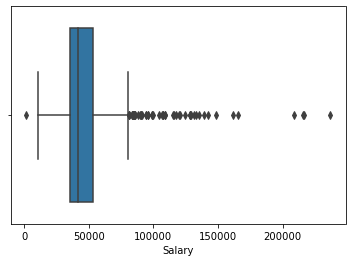

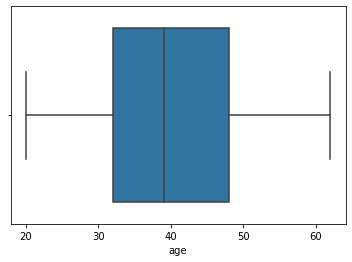

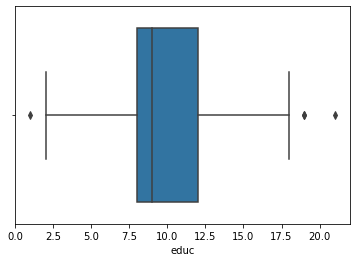

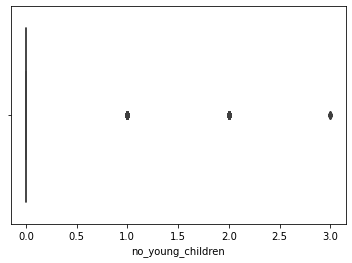

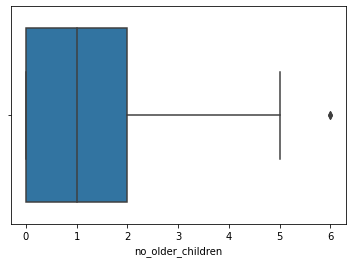

In [10]:
num_cols = ['Salary','age','educ','no_young_children','no_older_children'];
for i in num_cols:
    sns.boxplot(df[i])
    plt.show()

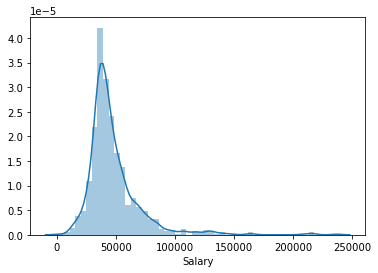

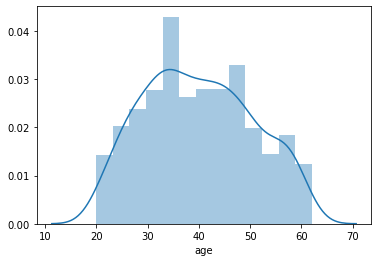

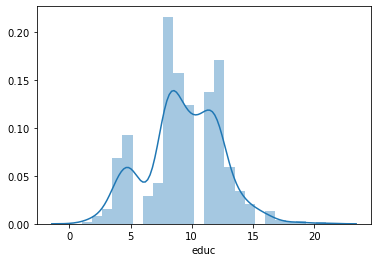

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


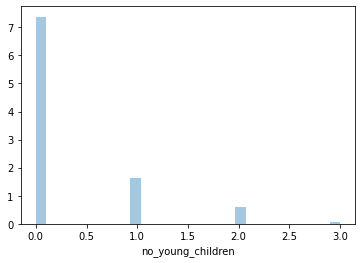

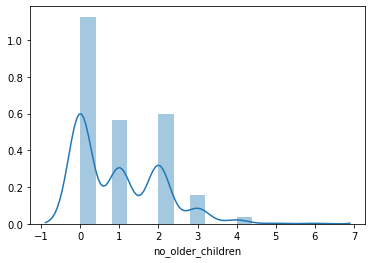

In [11]:
for i in num_cols:
    sns.distplot(df[i])
    plt.show()

In [12]:
# Duplicate check:
dupes = df.duplicated()
print('Number of duplicate rows is %d' % (dupes.sum()))

Number of duplicate rows is 0


Multivariate Analysis:

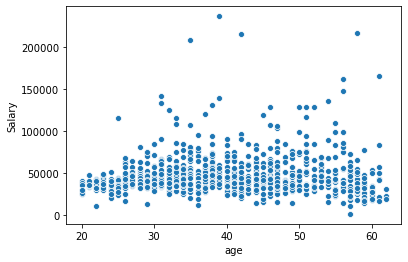

In [13]:
sns.scatterplot(data = df, x = 'age', y = 'Salary' )
plt.show()

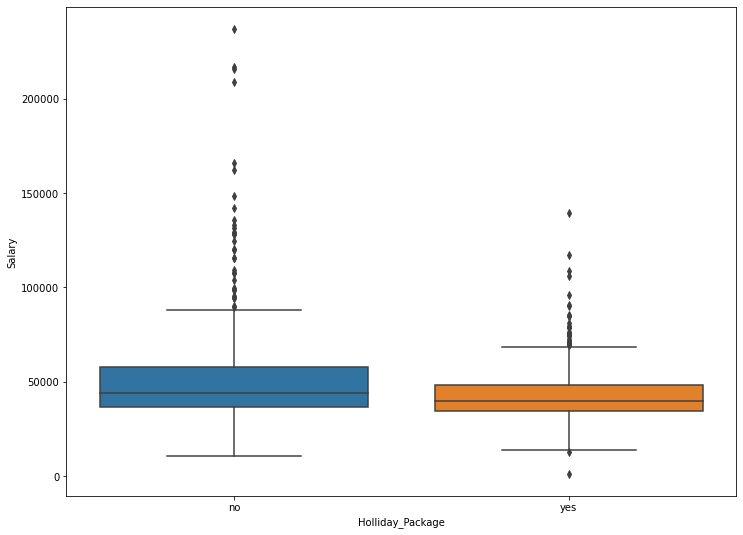

In [14]:
fig, ax = plt.subplots(figsize=(12,9))
sns.boxplot(x = 'Holliday_Package', y = 'Salary', data = df)

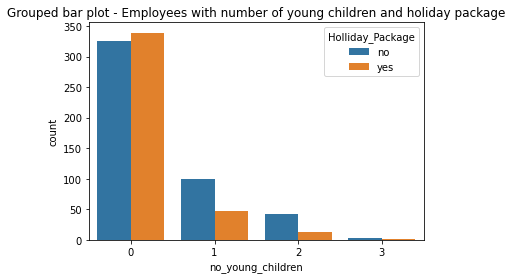

In [15]:
sns.countplot(x='no_young_children', hue='Holliday_Package', data=df)
plt.title('Grouped bar plot - Employees with number of young children and holiday package')
plt.show()

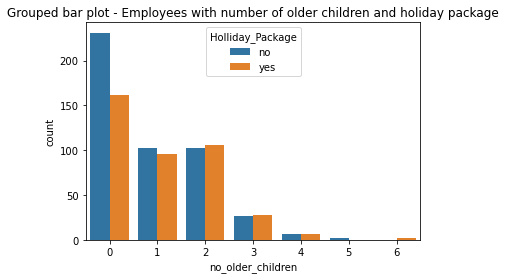

In [16]:
sns.countplot(x='no_older_children', hue='Holliday_Package', data=df)
plt.title('Grouped bar plot - Employees with number of older children and holiday package')
plt.show()

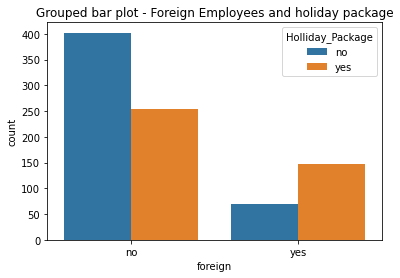

In [17]:
sns.countplot(x='foreign', hue='Holliday_Package', data=df)
plt.title('Grouped bar plot - Foreign Employees and holiday package')
plt.show()

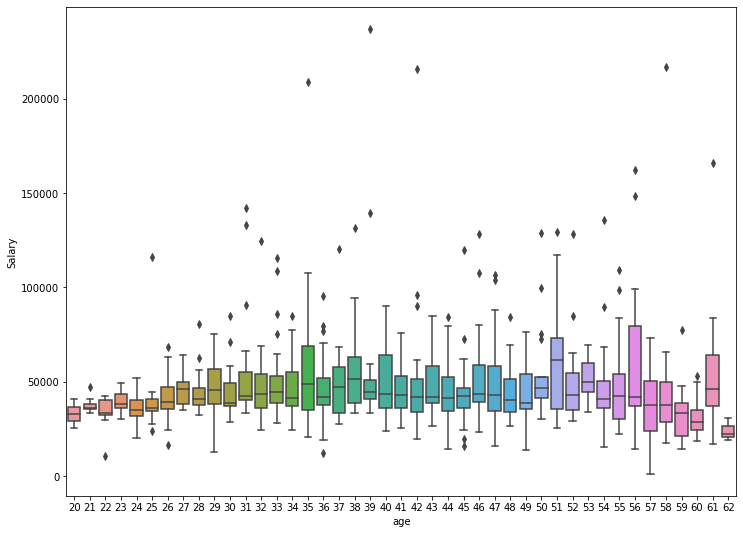

In [18]:
fig, ax = plt.subplots(figsize=(12,9))
sns.boxplot(x = 'age', y = 'Salary', data = df)

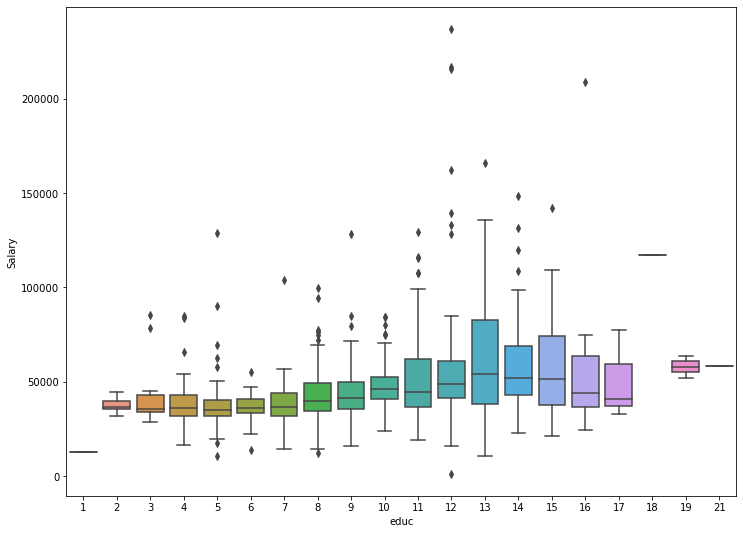

In [19]:
fig, ax = plt.subplots(figsize=(12,9))
sns.boxplot(x = 'educ', y = 'Salary', data = df)

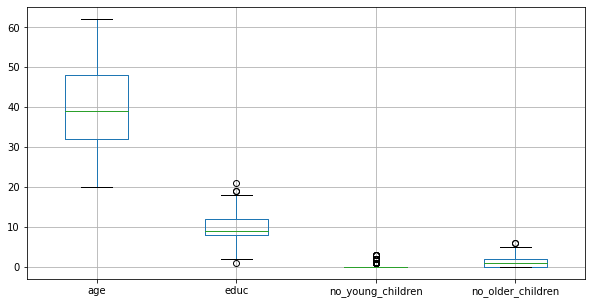

In [20]:
df[['age','educ','no_young_children','no_older_children']].boxplot(figsize = (10,5))
plt.show()

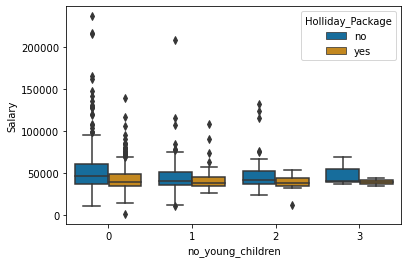

In [21]:
sns.boxplot(y = 'Salary',x = 'no_young_children',data = df, palette = "colorblind",hue = 'Holliday_Package')

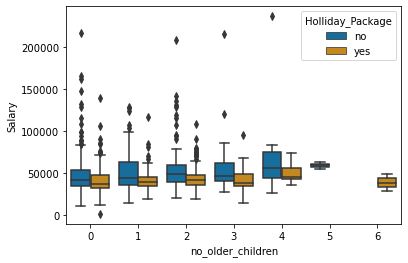

In [22]:
sns.boxplot(y = 'Salary',x = 'no_older_children',data = df, palette = "colorblind",hue = 'Holliday_Package')

### Converting object columns to categorical:

In [34]:
# Renaming the Target variable: 
df.rename(columns = {'Holliday_Package':'Holiday_Package'}, inplace = True)

In [35]:
# converting target column to categorical:
df.Holiday_Package = pd.Categorical(df.Holiday_Package).codes

In [36]:
# converting the foreign column into categorical:
df.foreign = pd.Categorical(df.foreign).codes

In [37]:
# Removing the unnamed column:
df = df.drop(['Unnamed: 0'], axis = 1)

### Multicollinearity checks:

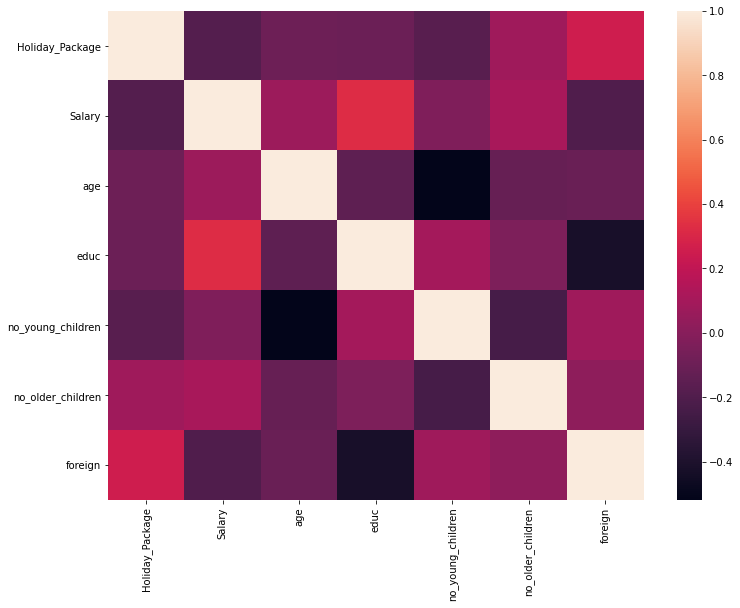

In [27]:
# Heatmap:
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(df.corr())

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


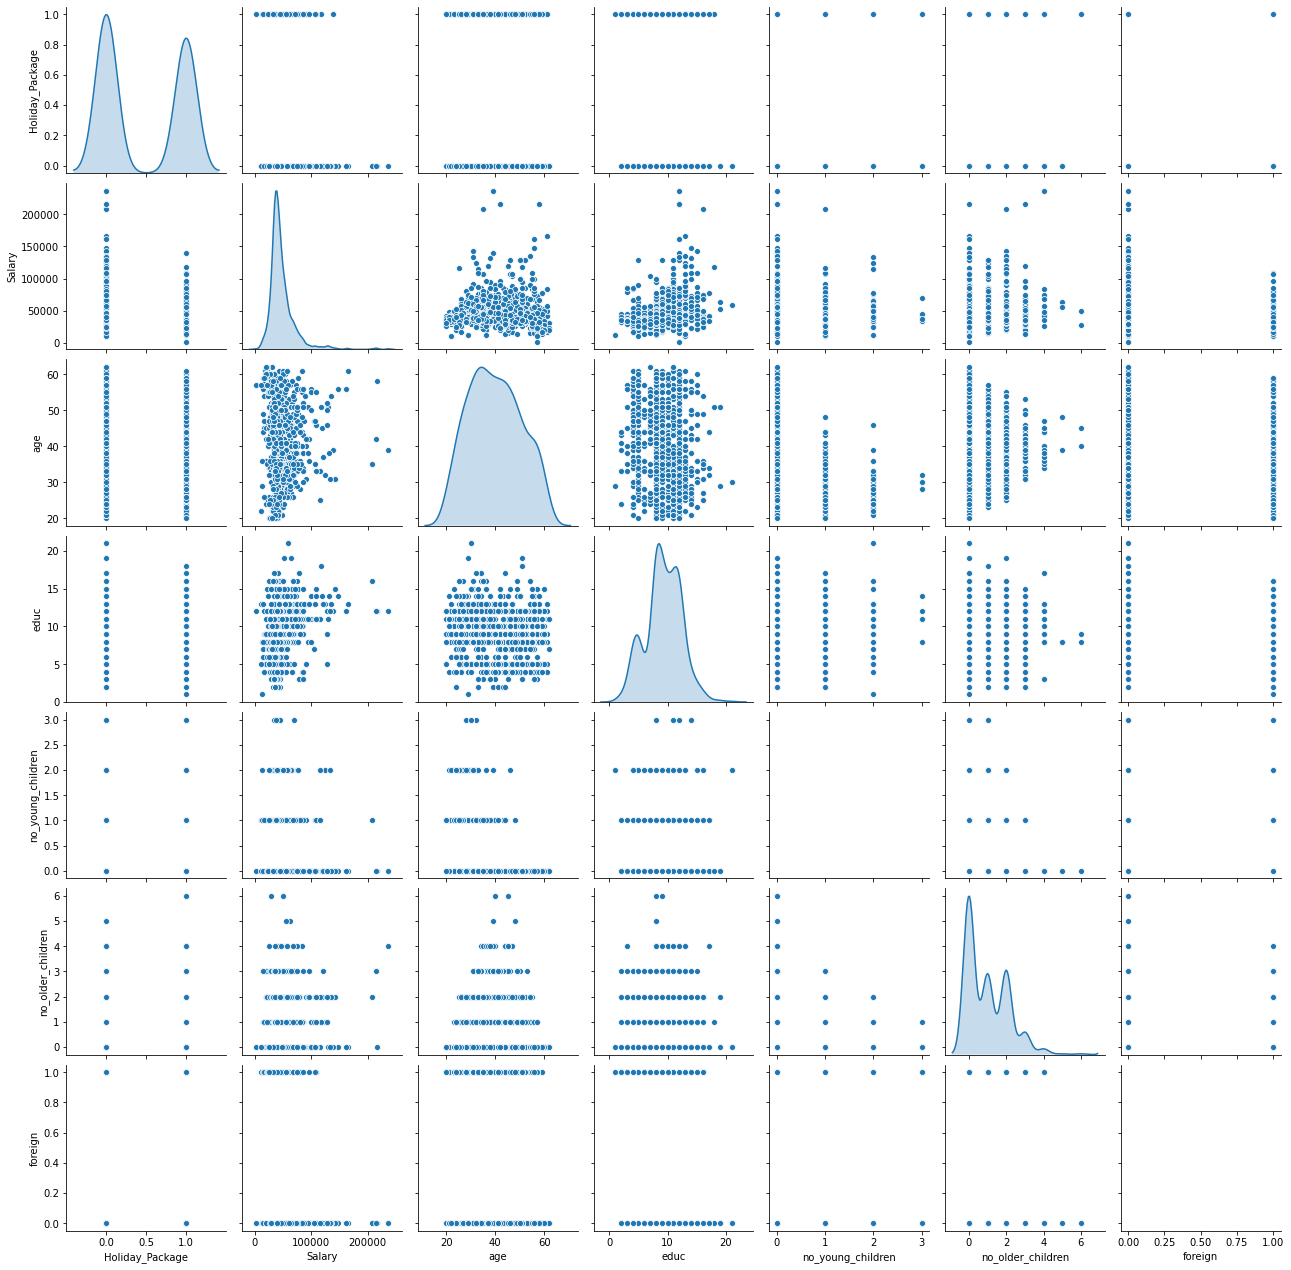

In [28]:
sns.pairplot(df, diag_kind = 'kde')

In [23]:
# Cross-table of 
df.groupby(['no_young_children','Holiday_Package'])['age'].count().unstack()

Holiday_Package,0,1
no_young_children,,
0,326,339
1,100,47
2,42,13
3,3,2


In [24]:
df.groupby(['no_older_children','Holiday_Package'])['age'].count().unstack()

Holiday_Package,0,1
no_older_children,,
0,231.0,162.0
1,102.0,96.0
2,102.0,106.0
3,27.0,28.0
4,7.0,7.0
5,2.0,NaN
6,NaN,2.0


In [21]:
df.loc[df['Holiday_Package'] == 'NaN']

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign


In [22]:
df.loc[df['no_older_children'] == 'NaN']

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign


In [23]:
df.loc[df['age'] == 'NaN']

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign


In [25]:
df.groupby(['foreign','Holiday_Package'])['age'].count().unstack()

Holiday_Package,0,1
foreign,,
0,402,254
1,69,147


In [3]:
df.loc[df['Salary']>100000]

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
13,14,no,148221,56,14,0,0,no
17,18,yes,139253,39,12,0,0,no
30,31,no,129262,51,11,0,0,no
62,63,no,165895,61,13,0,0,no
73,74,no,107442,35,11,1,2,no
108,109,no,216630,58,12,0,0,no
147,148,no,142183,31,15,0,2,no
162,163,no,162024,56,12,0,0,no
185,186,no,124627,32,13,2,1,no
253,254,yes,117276,51,18,0,1,no


### Combining two columns into one: 'no_young_children' & 'no_older_children' is combined to form 'Number_of_children'

In [38]:
df['Number_of_children'] = df['no_young_children'] + df['no_older_children']

In [39]:
df = df.drop(['no_young_children','no_older_children'], axis = 1)

In [40]:
df.head()

,Holiday_Package,Salary,age,educ,foreign,Number_of_children
0,0,48412,30,8,0,2
1,1,37207,45,8,0,1
2,0,58022,46,9,0,0
3,0,66503,31,11,0,2
4,0,66734,44,12,0,2


### Binning age,educ and Salary variables:

In [41]:
df['age'] = pd.cut(df.age, bins=[20,30,40,50,62], labels= ['1','2','3','4'])

In [42]:
df['educ'] = pd.cut(df.educ, bins=[1,5,9,12,16,21], labels= ['1','2','3','4','5'])

In [43]:
df['Salary'] = pd.cut(df.Salary,
       10, labels=["1","2","3","4","5","6","7","8","9","10"])

In [48]:
df.head(10)

,Unnamed: 0,Holiday_Package,Salary,age,educ,foreign,Number_of_children
0,1,0,2,1,2,0,2
1,2,1,2,3,2,0,1
2,3,0,3,3,2,0,0
3,4,0,3,2,3,0,2
4,5,0,3,3,3,0,2
5,6,1,3,3,3,0,1
6,7,0,4,4,2,0,0
7,8,1,2,2,2,0,2
8,9,0,2,2,3,0,0
9,10,0,2,3,3,0,2


In [44]:
df.isnull().sum()

Holiday_Package       0
Salary                0
age                   8
educ                  1
foreign               0
Number_of_children    0
dtype: int64

In [45]:
df = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [46]:
df.head()

,Holiday_Package,Salary,age,educ,foreign,Number_of_children
0,0,2,1,2,0,2
1,1,2,3,2,0,1
2,0,3,3,2,0,0
3,0,3,2,3,0,2
4,0,3,3,3,0,2


### Train-Test Split:

In [390]:
X = df.drop(['Holiday_Package'], axis = 1)
y = df.pop('Holiday_Package')

In [391]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [164]:
train = pd.concat([X_train,y_train],axis = 1,join = 'outer')
test = pd.concat([X_test,y_test],axis = 1,join = 'outer')

In [165]:
print('\n')
print ("---- Train ----")
print(pd.DataFrame([train.Holiday_Package.value_counts(),round(train.Holiday_Package.value_counts()/train.shape[0]*100,1)],index=['Count','Percent']).T)
print('\n')
print('\n')
print ("---- Test ----")
print(pd.DataFrame([test.Holiday_Package.value_counts(),round(test.Holiday_Package.value_counts()/test.shape[0]*100,1)],index=['Count','Percent']).T)
print('\n')



---- Train ----
   Count  Percent
0  327.0     54.1
1  277.0     45.9




---- Test ----
   Count  Percent
0  140.0     54.1
1  119.0     45.9




In [166]:
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.1s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

### Predicting on Training and Test dataset

In [167]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

### Getting the Predicted Classes and Probs

In [168]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.606857,0.393143
1,0.575723,0.424277
2,0.583916,0.416084
3,0.657812,0.342188
4,0.692432,0.307568


## Model Evaluation

In [169]:
model.score(X_train, y_train)

0.6125827814569537

### AUC and ROC for the training data

AUC: 0.664


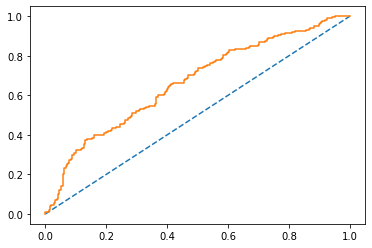

In [170]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [171]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.6023166023166023

### AUC and ROC for the test data

AUC: 0.664


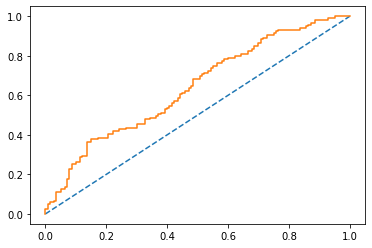

In [172]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Confusion Matrix and Classification report for the train data:

In [173]:
confusion_matrix(y_train, ytrain_predict)

array([[239,  88],
       [146, 131]], dtype=int64)

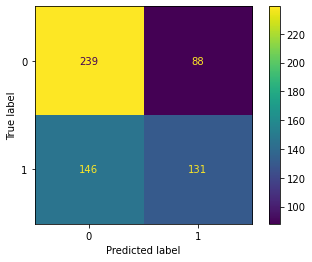

In [174]:
plot_confusion_matrix(model,X_train,y_train);

In [175]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.62      0.73      0.67       327
           1       0.60      0.47      0.53       277

    accuracy                           0.61       604
   macro avg       0.61      0.60      0.60       604
weighted avg       0.61      0.61      0.61       604



### Confusion Matrix and Classification report for the test data:

In [176]:
confusion_matrix(y_test, ytest_predict)

array([[106,  34],
       [ 69,  50]], dtype=int64)

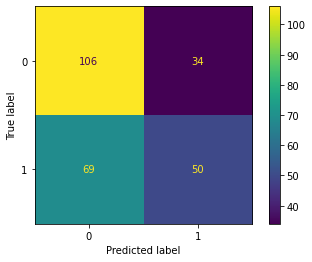

In [177]:
plot_confusion_matrix(model,X_test,y_test);

In [178]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.61      0.76      0.67       140
           1       0.60      0.42      0.49       119

    accuracy                           0.60       259
   macro avg       0.60      0.59      0.58       259
weighted avg       0.60      0.60      0.59       259



### Applying GridSearchCV for Logistic Regression:

In [242]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.1,0.01,0.001]}

In [243]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [244]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [245]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.1, 0.01, 0.001]},
             scoring='f1')

In [246]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'sag', 'tol': 0.1} 

LogisticRegression(max_iter=10000, n_jobs=2, solver='sag', tol=0.1)


In [247]:
best_model = grid_search.best_estimator_

In [248]:
best_model.score(X_train, y_train)

0.6274834437086093

In [249]:
best_model.score(X_test, y_test)

0.6177606177606177

In [250]:
# Prediction on the training set
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [251]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.622221,0.377779
1,0.568458,0.431542
2,0.605872,0.394128
3,0.662084,0.337916
4,0.714462,0.285538


              precision    recall  f1-score   support

           0       0.62      0.80      0.70       327
           1       0.64      0.43      0.51       277

    accuracy                           0.63       604
   macro avg       0.63      0.61      0.61       604
weighted avg       0.63      0.63      0.61       604
 



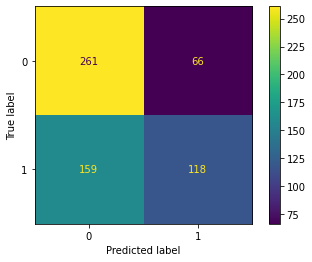

In [252]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.61      0.79      0.69       140
           1       0.63      0.41      0.50       119

    accuracy                           0.62       259
   macro avg       0.62      0.60      0.59       259
weighted avg       0.62      0.62      0.60       259
 



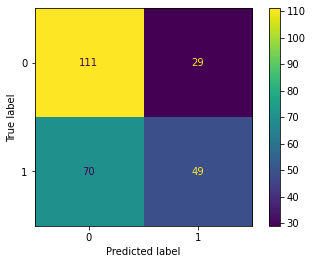

In [253]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');


### Building a logistic regression model using the GLM model approach:

In [47]:
import statsmodels.formula.api as sm

In [48]:
formula = 'Holiday_Package~Number_of_children+Salary+age+educ+foreign'

In [49]:
df.head()

,Holiday_Package,Salary,age,educ,foreign,Number_of_children
0,0,2,1,2,0,2
1,1,2,3,2,0,1
2,0,3,3,2,0,0
3,0,3,2,3,0,2
4,0,3,3,3,0,2


In [50]:
model1 = sm.logit(formula,data=df).fit(method = 'bfgs')

         Current function value: 0.606794
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [51]:
print(model1.summary())

                           Logit Regression Results                           
Dep. Variable:        Holiday_Package   No. Observations:                  863
Model:                          Logit   Df Residuals:                      845
Method:                           MLE   Df Model:                           17
Date:                Sun, 14 Mar 2021   Pseudo R-squ.:                  0.1203
Time:                        16:27:15   Log-Likelihood:                -523.66
converged:                      False   LL-Null:                       -595.26
Covariance Type:            nonrobust   LLR p-value:                 5.209e-22
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.8383      0.471     -1.779      0.075      -1.762       0.085
Salary[T.2]            0.6407      0.367      1.746      0.081      -0.078       1.360
Salary[T.3]         

In [52]:
print('McFadden Psuedo R Squared =',round(model1.prsquared,2))

McFadden Psuedo R Squared = 0.12


In [54]:
models=[model1] 
model_names= {model1: 'Model 1: Binning the Salary, educ & age variables'} 
for i in models:
    ll_Intercept=i.llnull
    ll_Model = i.llf
    N= df.shape[0]
    num=(1- np.exp((ll_Model - ll_Intercept)*(-2/N)))
    den=( 1- np.exp((ll_Intercept)*(2/N)))
    nagelkerke_r2 = num/den
    print('Nagelkerke R Squared for {} ='.format(model_names[i]),round(nagelkerke_r2,2))

Nagelkerke R Squared for Model 1: Binning the Salary, educ & age variables = 0.2


In [78]:
predicted_df=pd.DataFrame(model1.predict(df.drop('Holiday_Package',axis=1)),columns=['predicted_prob'])

In [82]:
def zero_one(x):
    threshold =0.50
    if x>threshold:
        return 1
    else:
        return 0
predicted_df['Label']=predicted_df.predicted_prob.apply(zero_one)
predicted_df['Holiday_Package'] = df.Holiday_Package
predicted_df.groupby(['Holiday_Package','Label']).count().unstack()

predicted_prob     
Label                        0    1
Holiday_Package                    
0                          353  114
1                          172  224

In [83]:
predicted_df=pd.DataFrame(model1.predict(df.drop('Holiday_Package',axis=1)),columns=['predicted_prob'])

In [84]:
# Let us change the threshold to 0.35:
def zero_one(x):
    threshold =0.35
    if x>threshold:
        return 1
    else:
        return 0
predicted_df['Label']=predicted_df.predicted_prob.apply(zero_one)
predicted_df['Holiday_Package'] = df.Holiday_Package
predicted_df.groupby(['Holiday_Package','Label']).count().unstack()

predicted_prob     
Label                        0    1
Holiday_Package                    
0                          234  233
1                           73  323

Area Under the Curve 0.7259


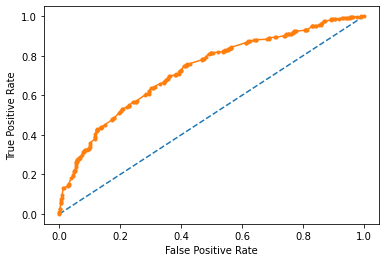

In [86]:
# AUC and ROC curve:
from sklearn import metrics 
# # calculate roc curve # 
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(df.Holiday_Package,model1.predict(df.drop('Holiday_Package',axis=1)))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
print('Area Under the Curve', round(metrics.auc(fpr,tpr),4))
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

### LDA Model:

In [393]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection

In [394]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

In [395]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

### Confusion Matrix on Training and Test Data:

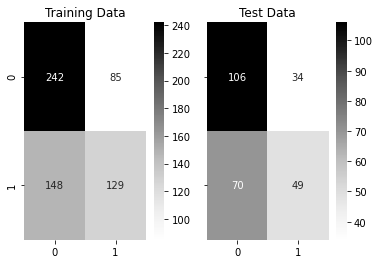

In [397]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

### Training Data and Test Data Classification Report Comparison:

In [398]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.62      0.74      0.68       327
           1       0.60      0.47      0.53       277

    accuracy                           0.61       604
   macro avg       0.61      0.60      0.60       604
weighted avg       0.61      0.61      0.61       604
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.60      0.76      0.67       140
           1       0.59      0.41      0.49       119

    accuracy                           0.60       259
   macro avg       0.60      0.58      0.58       259
weighted avg       0.60      0.60      0.59       259
 



### AUC and ROC for the train and test data:

In [399]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

AUC for the Training Data: 0.663
AUC for the Test Data: 0.632


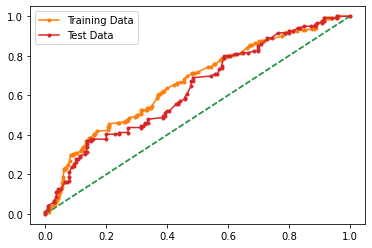

In [400]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### Changing Custom cut-off values to improve accuracy:

0.1 

Accuracy Score 0.4636
F1 Score 0.631 

Confusion Matrix


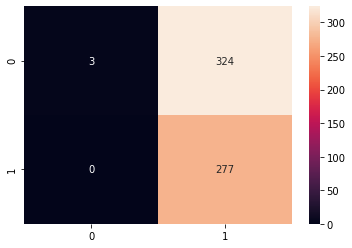

0.2 

Accuracy Score 0.4702
F1 Score 0.6339 

Confusion Matrix


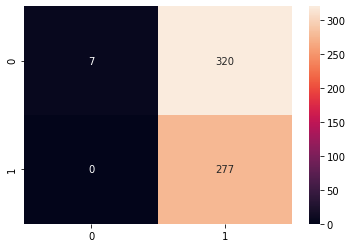

0.3 

Accuracy Score 0.4917
F1 Score 0.6279 

Confusion Matrix


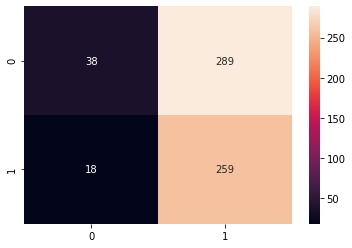

0.4 

Accuracy Score 0.6043
F1 Score 0.6076 

Confusion Matrix


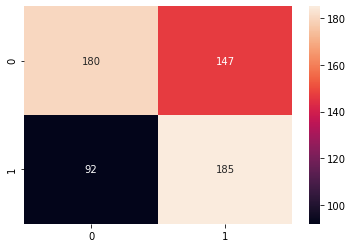

0.5 

Accuracy Score 0.6142
F1 Score 0.5255 

Confusion Matrix


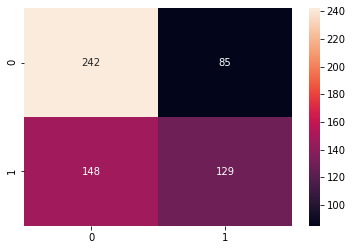

0.6 

Accuracy Score 0.6291
F1 Score 0.4563 

Confusion Matrix


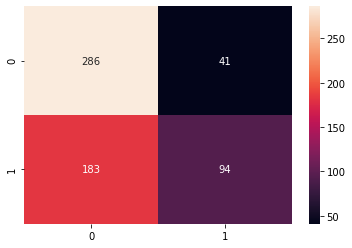

0.7 

Accuracy Score 0.5629
F1 Score 0.175 

Confusion Matrix


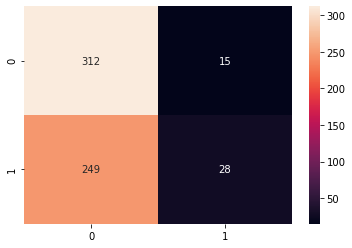

0.8 

Accuracy Score 0.5414
F1 Score 0.0 

Confusion Matrix


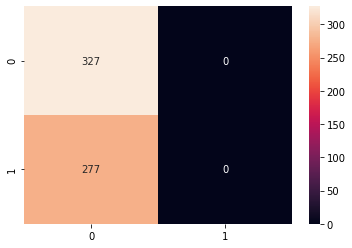

0.9 

Accuracy Score 0.5414
F1 Score 0.0 

Confusion Matrix


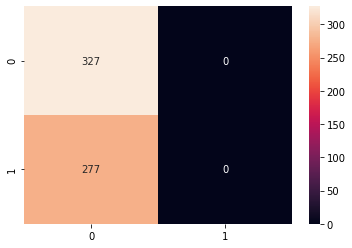

In [401]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

In [402]:
# Taking the cut-off value as 0.4 as both the accuracy and F1 score is 60%:
#Predicting the classes on the test data

data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_test[:,1])):
    if np.array(pred_prob_test[:,1])[i]>0.4:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

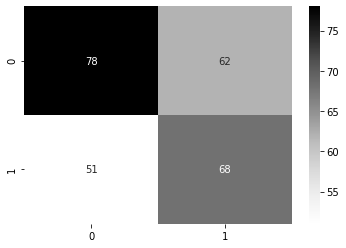

In [403]:
sns.heatmap((metrics.confusion_matrix(y_test,data_pred_custom_cutoff)),annot=True,fmt='.5g',cmap='Greys');

In [404]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n\n\n')
print('Classification Report of the custom cut-off test data:\n\n',metrics.classification_report(y_test,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

           0       0.60      0.76      0.67       140
           1       0.59      0.41      0.49       119

    accuracy                           0.60       259
   macro avg       0.60      0.58      0.58       259
weighted avg       0.60      0.60      0.59       259
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

           0       0.60      0.56      0.58       140
           1       0.52      0.57      0.55       119

    accuracy                           0.56       259
   macro avg       0.56      0.56      0.56       259
weighted avg       0.57      0.56      0.56       259
 



### Without binning the variables: age and educ and Salary:

In [55]:
df2 = pd.read_csv('Holiday_Package.csv')

In [56]:
df2['Number_of_children'] = df2['no_young_children'] + df2['no_older_children']

In [57]:
df2 = df2.drop(['no_young_children','no_older_children'], axis = 1)

In [58]:
df2.foreign = pd.Categorical(df2.foreign).codes

In [59]:
df2.rename(columns = {'Holliday_Package':'Holiday_Package'}, inplace = True)

In [60]:
df2.Holiday_Package = pd.Categorical(df2.Holiday_Package).codes

In [61]:
df2 = df2.drop(['Unnamed: 0'], axis = 1)

In [62]:
df2.isnull().sum()

Holiday_Package       0
Salary                0
age                   0
educ                  0
foreign               0
Number_of_children    0
dtype: int64

In [63]:
df2 = df2.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [414]:
X = df2.drop(['Holiday_Package'], axis = 1)
y = df2.pop('Holiday_Package')

In [415]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [73]:
model2 = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model2.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.3s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

### Predicting on the train and test dataset:

In [75]:
ytrain_predict = model2.predict(X_train)
ytest_predict = model2.predict(X_test)

### Getting the Predicted Classes and Probs

In [76]:
ytest_predict_prob=model2.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.600756,0.399244
1,0.472978,0.527022
2,0.611295,0.388705
3,0.619581,0.380419
4,0.675672,0.324328


### Model Evaluation on Train data:

In [77]:
# Accuracy - Training Data
model2.score(X_train, y_train)

0.6196721311475409

### AUC and ROC for the training data:

AUC: 0.658


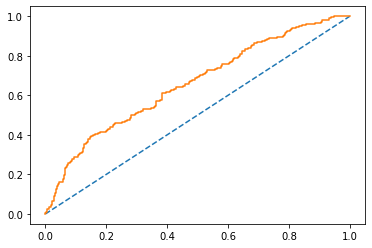

In [78]:
# predict probabilities
probs = model2.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### Model evaluation on Test data:

In [79]:
# Accuracy - Test Data
model2.score(X_test, y_test)

0.6412213740458015

AUC: 0.658


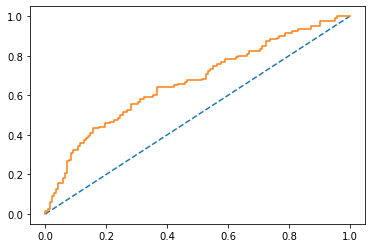

In [80]:
# predict probabilities
probs = model2.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Confusion Matrix for the training data:

In [81]:
confusion_matrix(y_train, ytrain_predict)

array([[249,  80],
       [152, 129]], dtype=int64)

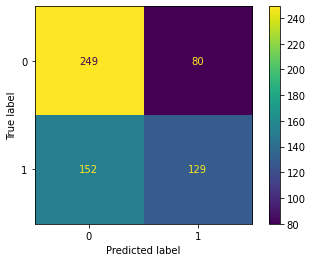

In [82]:
plot_confusion_matrix(model2,X_train,y_train);

In [83]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.62      0.76      0.68       329
           1       0.62      0.46      0.53       281

    accuracy                           0.62       610
   macro avg       0.62      0.61      0.60       610
weighted avg       0.62      0.62      0.61       610



### Confusion Matrix for test data:

In [84]:
confusion_matrix(y_test, ytest_predict)

array([[113,  29],
       [ 65,  55]], dtype=int64)

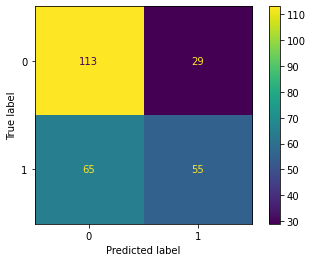

In [85]:
plot_confusion_matrix(model2,X_test,y_test);

In [86]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.63      0.80      0.71       142
           1       0.65      0.46      0.54       120

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.62       262
weighted avg       0.64      0.64      0.63       262



# Applying GridSearchCV for Logistic Regression:

In [111]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.01,0.001]}

In [112]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [113]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [114]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.01, 0.001]},
             scoring='f1')

In [115]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.01} 

LogisticRegression(max_iter=10000, n_jobs=2, tol=0.01)


In [116]:
best_model = grid_search.best_estimator_

In [117]:
best_model.score(X_train, y_train)

0.5393442622950819

In [118]:
best_model.score(X_test, y_test)

0.5419847328244275

In [119]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [120]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.534650,0.465350
1,0.556290,0.443710
2,0.539223,0.460777
3,0.549676,0.450324
4,0.572353,0.427647


              precision    recall  f1-score   support

           0       0.54      1.00      0.70       329
           1       0.00      0.00      0.00       281

    accuracy                           0.54       610
   macro avg       0.27      0.50      0.35       610
weighted avg       0.29      0.54      0.38       610
 



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


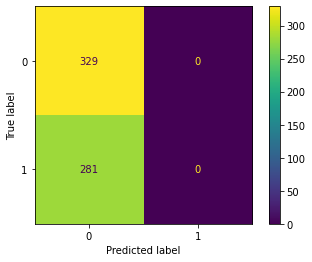

In [121]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.54      1.00      0.70       142
           1       0.00      0.00      0.00       120

    accuracy                           0.54       262
   macro avg       0.27      0.50      0.35       262
weighted avg       0.29      0.54      0.38       262
 



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


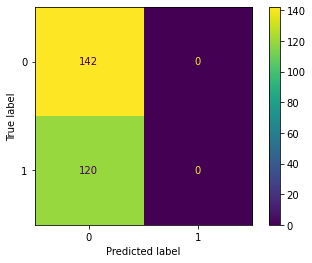

In [122]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

### Building a logistic regression model using the GLM model approach:

In [66]:
import statsmodels.formula.api as sm

In [72]:
formula = 'Holiday_Package~Number_of_children+Salary+age+educ+foreign'

In [73]:
model = sm.logit(formula,data=df2).fit()

Optimization terminated successfully.
         Current function value: 0.642532
         Iterations 5


In [74]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:        Holiday_Package   No. Observations:                  872
Model:                          Logit   Df Residuals:                      866
Method:                           MLE   Df Model:                            5
Date:                Sun, 14 Mar 2021   Pseudo R-squ.:                 0.06869
Time:                        16:41:09   Log-Likelihood:                -560.29
converged:                       True   LL-Null:                       -601.61
Covariance Type:            nonrobust   LLR p-value:                 2.343e-16
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.7656      0.490      1.561      0.119      -0.196       1.727
Number_of_children    -0.0945      0.072     -1.322      0.186      -0.235       0.046
Salary              

In [75]:
print('McFadden Psuedo R Squared =',round(model.prsquared,2))

McFadden Psuedo R Squared = 0.07


In [76]:
models=[model] 
model_names= {model: 'Model 2: Not Treating outliers for Salary and not binning the salary, educ & age variables'} 
for i in models:
    ll_Intercept=i.llnull
    ll_Model = i.llf
    N= df2.shape[0]
    num=(1- np.exp((ll_Model - ll_Intercept)*(-2/N)))
    den=( 1- np.exp((ll_Intercept)*(2/N)))
    nagelkerke_r2 = num/den
    print('Nagelkerke R Squared for {} ='.format(model_names[i]),round(nagelkerke_r2,2))

Nagelkerke R Squared for Model 1: Treating outliers for Salary and binning the educ & age variables = 0.12


### LDA Model:

In [416]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection

In [417]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

In [418]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

### Confusion Matrix on Training and Test Data:

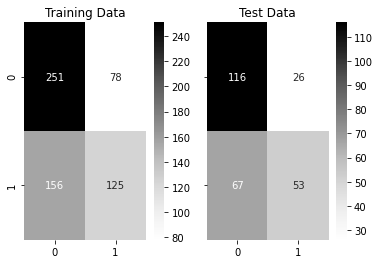

In [419]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


### Training Data and Test Data Classification Report Comparison:


In [420]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.62      0.76      0.68       329
           1       0.62      0.44      0.52       281

    accuracy                           0.62       610
   macro avg       0.62      0.60      0.60       610
weighted avg       0.62      0.62      0.61       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.63      0.82      0.71       142
           1       0.67      0.44      0.53       120

    accuracy                           0.65       262
   macro avg       0.65      0.63      0.62       262
weighted avg       0.65      0.65      0.63       262
 



### AUC and ROC for the train and test data:

In [421]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

AUC for the Training Data: 0.658
AUC for the Test Data: 0.665


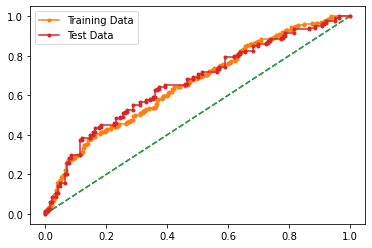

In [422]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### Changing Custom cut-off values to improve accuracy:

0.1 

Accuracy Score 0.4639
F1 Score 0.6322 

Confusion Matrix


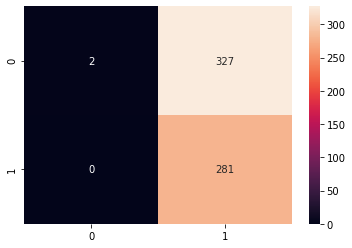

0.2 

Accuracy Score 0.4754
F1 Score 0.6372 

Confusion Matrix


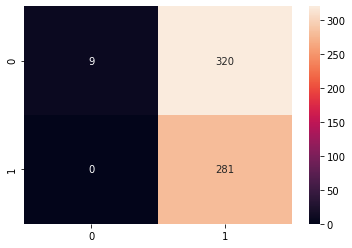

0.3 

Accuracy Score 0.5164
F1 Score 0.6467 

Confusion Matrix


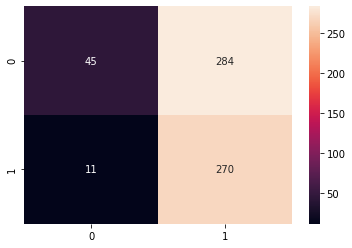

0.4 

Accuracy Score 0.5951
F1 Score 0.6073 

Confusion Matrix


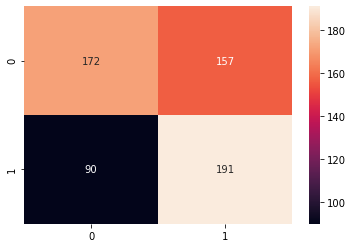

0.5 

Accuracy Score 0.6164
F1 Score 0.5165 

Confusion Matrix


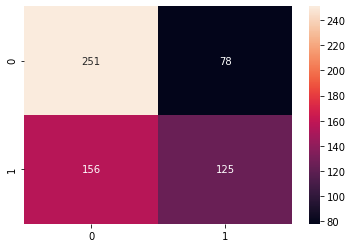

0.6 

Accuracy Score 0.6295
F1 Score 0.467 

Confusion Matrix


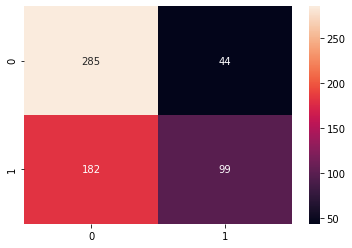

0.7 

Accuracy Score 0.5754
F1 Score 0.2031 

Confusion Matrix


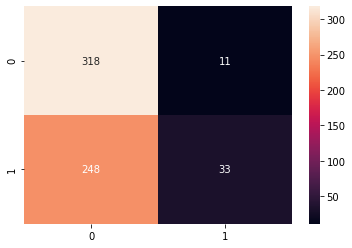

0.8 

Accuracy Score 0.5426
F1 Score 0.0141 

Confusion Matrix


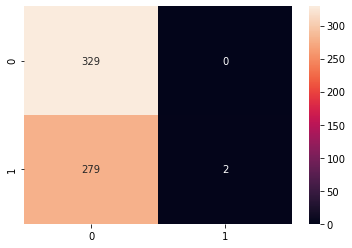

0.9 

Accuracy Score 0.5393
F1 Score 0.0 

Confusion Matrix


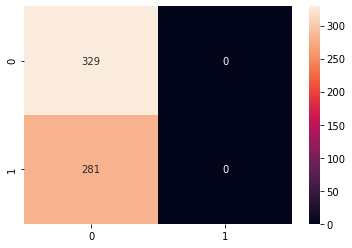

In [423]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

In [424]:
# Taking the cut-off value as 0.4 as both the accuracy and F1 score is 60%:
#Predicting the classes on the test data

data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_test[:,1])):
    if np.array(pred_prob_test[:,1])[i]>0.4:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

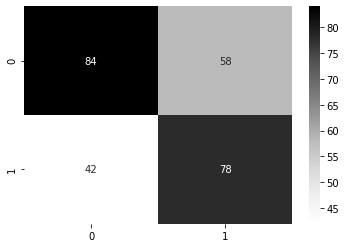

In [425]:
sns.heatmap((metrics.confusion_matrix(y_test,data_pred_custom_cutoff)),annot=True,fmt='.5g',cmap='Greys');

In [426]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n\n\n')
print('Classification Report of the custom cut-off test data:\n\n',metrics.classification_report(y_test,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

           0       0.63      0.82      0.71       142
           1       0.67      0.44      0.53       120

    accuracy                           0.65       262
   macro avg       0.65      0.63      0.62       262
weighted avg       0.65      0.65      0.63       262
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

           0       0.67      0.59      0.63       142
           1       0.57      0.65      0.61       120

    accuracy                           0.62       262
   macro avg       0.62      0.62      0.62       262
weighted avg       0.62      0.62      0.62       262
 



# Treating outliers for Salary and binning the educ & age variables:

In [61]:
df3 = pd.read_csv('Holiday_Package.csv')

In [62]:
df3['Number_of_children'] = df3['no_young_children'] + df3['no_older_children']

In [63]:
df3 = df3.drop(['no_young_children','no_older_children'], axis = 1)

In [64]:
df3.foreign = pd.Categorical(df3.foreign).codes

In [65]:
df3.rename(columns = {'Holliday_Package':'Holiday_Package'}, inplace = True)

In [66]:
df3.Holiday_Package = pd.Categorical(df3.Holiday_Package).codes

In [67]:
df3['age'] = pd.cut(df3.age, bins=[20,30,40,50,62], labels= ['1','2','3','4'])

In [68]:
df3['educ'] = pd.cut(df3.educ, bins=[1,5,9,12,16,21], labels= ['1','2','3','4','5'])

In [69]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [70]:
lr,ur=remove_outlier(df3['Salary'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df3['Salary']=np.where(df3['Salary']>ur,ur,df3['Salary'])
df3['Salary']=np.where(df3['Salary']<lr,lr,df3['Salary'])

Lower Range : 8105.75 
Upper Range : 80687.75


In [71]:
df3 = df3.drop(['Unnamed: 0'], axis = 1)

In [72]:
df3.isnull().sum()

Holiday_Package       0
Salary                0
age                   8
educ                  1
foreign               0
Number_of_children    0
dtype: int64

In [73]:
df3 = df3.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [74]:
df3.head()

,Holiday_Package,Salary,age,educ,foreign,Number_of_children
0,0,48412.0,1,2,0,2
1,1,37207.0,3,2,0,1
2,0,58022.0,3,2,0,0
3,0,66503.0,2,3,0,2
4,0,66734.0,3,3,0,2


In [75]:
X = df3.drop(['Holiday_Package'], axis = 1)
y = df3.pop('Holiday_Package')

In [442]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [134]:
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.9s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

### Predicting on Training and Test dataset

In [135]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

### Getting the Predicted Classes and Probs:

In [136]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.595300,0.404700
1,0.571532,0.428468
2,0.594088,0.405912
3,0.667842,0.332158
4,0.691318,0.308682


### Model Evaluation for train:

In [137]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.6192052980132451

### AUC and ROC for the training data:

AUC: 0.665


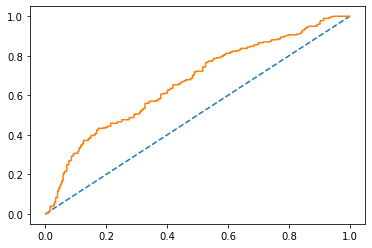

In [138]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### Model Evaluation for Test:

In [139]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.5868725868725869

### AUC and ROC for the test data:

AUC: 0.665


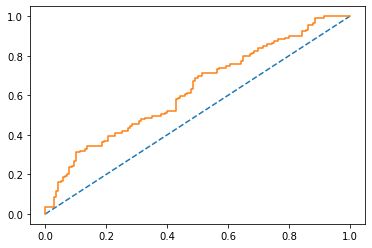

In [140]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Confusion Matrix & Classification report for the training data:

In [141]:
confusion_matrix(y_train, ytrain_predict)

array([[245,  82],
       [148, 129]], dtype=int64)

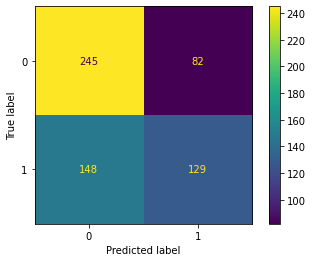

In [142]:
plot_confusion_matrix(model,X_train,y_train);

In [143]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.62      0.75      0.68       327
           1       0.61      0.47      0.53       277

    accuracy                           0.62       604
   macro avg       0.62      0.61      0.60       604
weighted avg       0.62      0.62      0.61       604



### Confusion Matrix & Classification report for the testing data:

In [144]:
confusion_matrix(y_test, ytest_predict)

array([[102,  38],
       [ 69,  50]], dtype=int64)

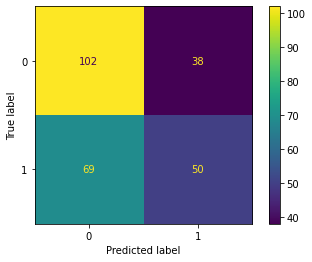

In [145]:
plot_confusion_matrix(model,X_test,y_test);

In [146]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.60      0.73      0.66       140
           1       0.57      0.42      0.48       119

    accuracy                           0.59       259
   macro avg       0.58      0.57      0.57       259
weighted avg       0.58      0.59      0.58       259



### Applying GridSearchCV for Logistic Regression:

In [305]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.1,0.01,0.001]}

In [306]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [307]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [308]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.1, 0.01, 0.001]},
             scoring='f1')

In [309]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'sag', 'tol': 0.1} 

LogisticRegression(max_iter=10000, n_jobs=2, solver='sag', tol=0.1)


In [310]:
best_model = grid_search.best_estimator_

In [311]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [312]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.565702,0.434298
1,0.581166,0.418834
2,0.578288,0.421712
3,0.616005,0.383995
4,0.567073,0.432927


              precision    recall  f1-score   support

           0       0.54      1.00      0.70       327
           1       0.00      0.00      0.00       277

    accuracy                           0.54       604
   macro avg       0.27      0.50      0.35       604
weighted avg       0.29      0.54      0.38       604
 



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


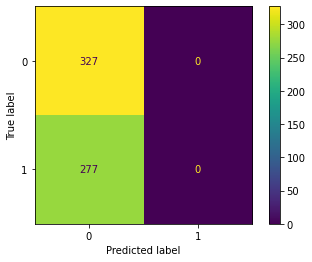

In [313]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.54      1.00      0.70       140
           1       0.00      0.00      0.00       119

    accuracy                           0.54       259
   macro avg       0.27      0.50      0.35       259
weighted avg       0.29      0.54      0.38       259
 



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


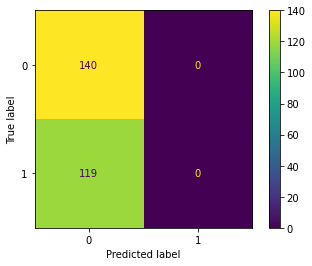

In [314]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

### Building a logistic regression model using the GLM model approach:

In [35]:
import statsmodels.formula.api as sm

In [36]:
formula = 'Holiday_Package~Number_of_children+Salary+age+educ+foreign'

In [37]:
model = sm.logit(formula,data=df3).fit()

Optimization terminated successfully.
         Current function value: 0.607812
         Iterations 5


In [38]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:        Holiday_Package   No. Observations:                  863
Model:                          Logit   Df Residuals:                      852
Method:                           MLE   Df Model:                           10
Date:                Mon, 15 Mar 2021   Pseudo R-squ.:                  0.1188
Time:                        15:51:49   Log-Likelihood:                -524.54
converged:                       True   LL-Null:                       -595.26
Covariance Type:            nonrobust   LLR p-value:                 2.135e-25
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.7180      0.362      1.984      0.047       0.009       1.427
age[T.2]               1.0971      0.216      5.080      0.000       0.674       1.520
age[T.3]            

### Calculate McFadden R-square:

In [39]:
print('McFadden Psuedo R Squared =',round(model.prsquared,2))

McFadden Psuedo R Squared = 0.12


### Calculate Nagelkerke R-square:

In [40]:
models=[model] 
model_names= {model: 'Model 3: Treating outliers for Salary and binning the educ & age variables'} 
for i in models:
    ll_Intercept=i.llnull
    ll_Model = i.llf
    N= df3.shape[0]
    num=(1- np.exp((ll_Model - ll_Intercept)*(-2/N)))
    den=( 1- np.exp((ll_Intercept)*(2/N)))
    nagelkerke_r2 = num/den
    print('Nagelkerke R Squared for {} ='.format(model_names[i]),round(nagelkerke_r2,2))

Nagelkerke R Squared for Model 3: Treating outliers for Salary and binning the educ & age variables = 0.2


In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [77]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [45]:
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [60]:
# Calculating Vif value
vif_cal(input_data=df3.columns
['age', 'educ', 'Number_of_children', 'Salary',
       'Foreign'], dependent_col='Holiday_Package')

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [44]:
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [41]:
def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]]
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)
vif_cal(input_data=df3.drop(['Holiday_Package'],axis=1))

PatsyError: categorical data cannot be >1-dimensional

In [107]:
predicted_df=pd.DataFrame(model.predict(df3.drop('Holiday_Package',axis=1)),columns=['predicted_prob'])

In [108]:
def zero_one(x):
    threshold =0.50
    if x>threshold:
        return 1
    else:
        return 0
predicted_df['Label']=predicted_df.predicted_prob.apply(zero_one)
predicted_df['Holiday_Package'] = df3.Holiday_Package
predicted_df.groupby(['Holiday_Package','Label']).count().unstack()

predicted_prob     
Label                        0    1
Holiday_Package                    
0                          349  118
1                          171  225

In [109]:
predicted_df=pd.DataFrame(model.predict(df3.drop('Holiday_Package',axis=1)),columns=['predicted_prob'])

In [110]:
# Let us change the threshold to 0.35:
def zero_one(x):
    threshold =0.35
    if x>threshold:
        return 1
    else:
        return 0
predicted_df['Label']=predicted_df.predicted_prob.apply(zero_one)
predicted_df['Holiday_Package'] = df3.Holiday_Package
predicted_df.groupby(['Holiday_Package','Label']).count().unstack()

predicted_prob     
Label                        0    1
Holiday_Package                    
0                          222  245
1                           72  324

Area Under the Curve 0.7239


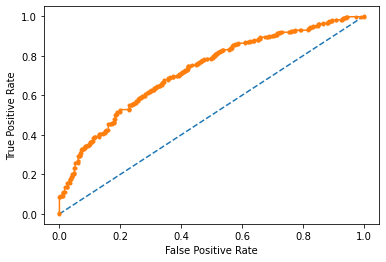

In [111]:
# AUC and ROC curve:
from sklearn import metrics 
# # calculate roc curve # 
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(df3.Holiday_Package,model.predict(df3.drop('Holiday_Package',axis=1)))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
print('Area Under the Curve', round(metrics.auc(fpr,tpr),4))
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

### LDA Model:

In [443]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection

In [444]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

In [446]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

### Confusion Matrix on Training and Test Data:

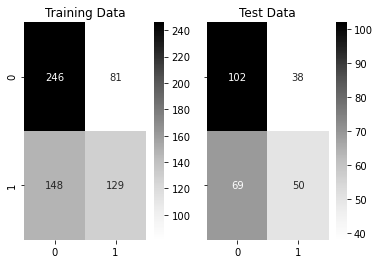

In [447]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

### Training Data and Test Data Classification Report Comparison:

In [448]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.62      0.75      0.68       327
           1       0.61      0.47      0.53       277

    accuracy                           0.62       604
   macro avg       0.62      0.61      0.61       604
weighted avg       0.62      0.62      0.61       604
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.60      0.73      0.66       140
           1       0.57      0.42      0.48       119

    accuracy                           0.59       259
   macro avg       0.58      0.57      0.57       259
weighted avg       0.58      0.59      0.58       259
 



### AUC and ROC for the train and test data:

In [449]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

AUC for the Training Data: 0.665
AUC for the Test Data: 0.629


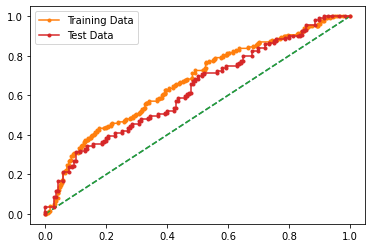

In [450]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### Changing Custom cut-off values to improve accuracy:

0.1 

Accuracy Score 0.4586
F1 Score 0.6288 

Confusion Matrix


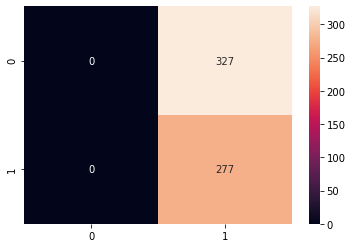

0.2 

Accuracy Score 0.4685
F1 Score 0.6331 

Confusion Matrix


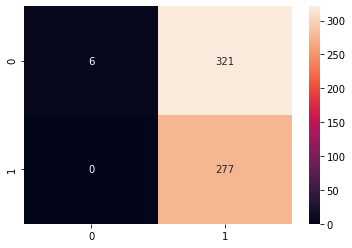

0.3 

Accuracy Score 0.5066
F1 Score 0.6294 

Confusion Matrix


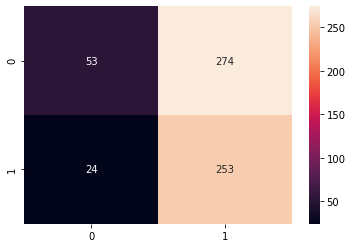

0.4 

Accuracy Score 0.6026
F1 Score 0.6066 

Confusion Matrix


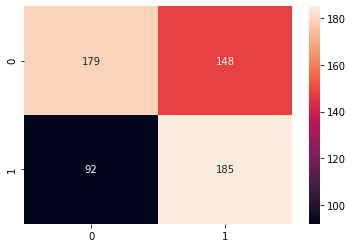

0.5 

Accuracy Score 0.6209
F1 Score 0.5298 

Confusion Matrix


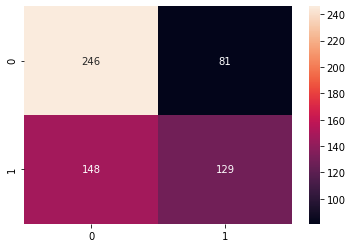

0.6 

Accuracy Score 0.6358
F1 Score 0.4634 

Confusion Matrix


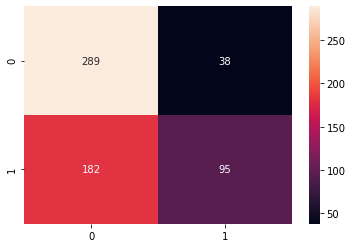

0.7 

Accuracy Score 0.5745
F1 Score 0.2141 

Confusion Matrix


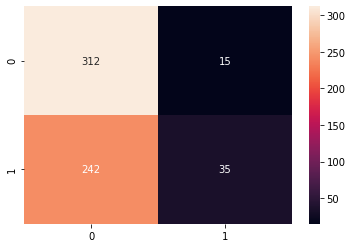

0.8 

Accuracy Score 0.5397
F1 Score 0.0 

Confusion Matrix


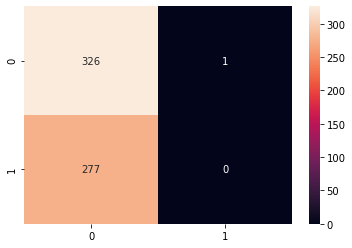

0.9 

Accuracy Score 0.5414
F1 Score 0.0 

Confusion Matrix


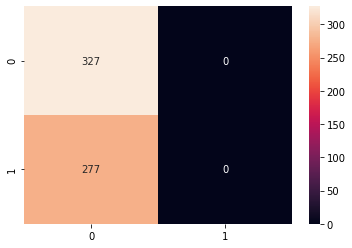

In [452]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();


In [453]:
# Taking the cut-off value as 0.4 as both the accuracy and F1 score is 60%:
#Predicting the classes on the test data

data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_test[:,1])):
    if np.array(pred_prob_test[:,1])[i]>0.4:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

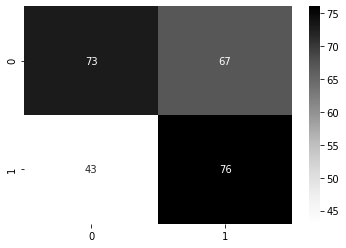

In [454]:
sns.heatmap((metrics.confusion_matrix(y_test,data_pred_custom_cutoff)),annot=True,fmt='.5g',cmap='Greys');

In [455]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n\n\n')
print('Classification Report of the custom cut-off test data:\n\n',metrics.classification_report(y_test,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

           0       0.60      0.73      0.66       140
           1       0.57      0.42      0.48       119

    accuracy                           0.59       259
   macro avg       0.58      0.57      0.57       259
weighted avg       0.58      0.59      0.58       259
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

           0       0.63      0.52      0.57       140
           1       0.53      0.64      0.58       119

    accuracy                           0.58       259
   macro avg       0.58      0.58      0.58       259
weighted avg       0.58      0.58      0.57       259
 



# Treating outliers for Salary and not binning the variables educ and age:

In [2]:
df4 = pd.read_csv('Holiday_Package.csv')

In [3]:
df4['Number_of_children'] = df4['no_young_children'] + df4['no_older_children']

In [4]:
df4 = df4.drop(['no_young_children','no_older_children'], axis = 1)

In [5]:
df4.foreign = pd.Categorical(df4.foreign).codes

In [6]:
df4.rename(columns = {'Holliday_Package':'Holiday_Package'}, inplace = True)

In [7]:
df4.Holiday_Package = pd.Categorical(df4.Holiday_Package).codes

In [8]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [9]:
lr,ur=remove_outlier(df4['Salary'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df4['Salary']=np.where(df4['Salary']>ur,ur,df4['Salary'])
df4['Salary']=np.where(df4['Salary']<lr,lr,df4['Salary'])

Lower Range : 8105.75 
Upper Range : 80687.75


In [10]:
df4 = df4.drop(['Unnamed: 0'], axis = 1)

In [11]:
df4.isnull().sum()

Holiday_Package       0
Salary                0
age                   0
educ                  0
foreign               0
Number_of_children    0
dtype: int64

In [12]:
df4 = df4.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [13]:
df4.head()

,Holiday_Package,Salary,age,educ,foreign,Number_of_children
0,0,48412.0,30,8,0,2
1,1,37207.0,45,8,0,1
2,0,58022.0,46,9,0,0
3,0,66503.0,31,11,0,2
4,0,66734.0,44,12,0,2


In [468]:
X = df4.drop(['Holiday_Package'], axis = 1)
y = df4.pop('Holiday_Package')

In [469]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [37]:
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    2.1s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

### Predicting on Training and Test dataset:

In [38]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

### Getting the Predicted Classes and Probs:

In [39]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.599809,0.400191
1,0.468496,0.531504
2,0.611365,0.388635
3,0.614050,0.385950
4,0.686662,0.313338


## Model Evaluation for train data:

In [40]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.6147540983606558

### AUC and ROC for the training data:

AUC: 0.657


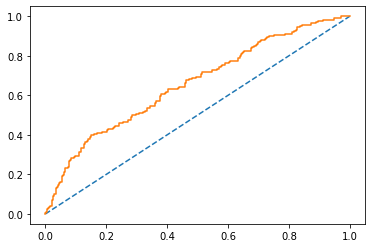

In [41]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### Model Evaluation for test data:

In [42]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.6374045801526718

### AUC and ROC for the test data:

AUC: 0.657


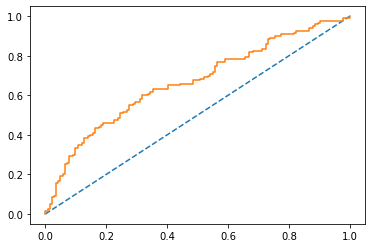

In [43]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Confusion Matrix & Classification report for the training data:

In [44]:
confusion_matrix(y_train, ytrain_predict)

array([[246,  83],
       [152, 129]], dtype=int64)

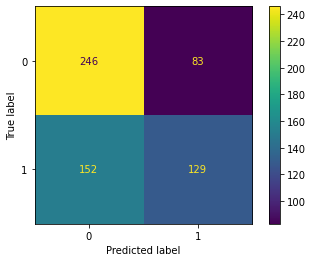

In [45]:
plot_confusion_matrix(model,X_train,y_train);

In [46]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.62      0.75      0.68       329
           1       0.61      0.46      0.52       281

    accuracy                           0.61       610
   macro avg       0.61      0.60      0.60       610
weighted avg       0.61      0.61      0.61       610



### Confusion Matrix & Classification report for the testing data:

In [47]:
confusion_matrix(y_test, ytest_predict)

array([[112,  30],
       [ 65,  55]], dtype=int64)

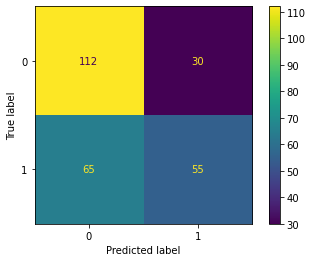

In [48]:
plot_confusion_matrix(model,X_test,y_test);

In [49]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.63      0.79      0.70       142
           1       0.65      0.46      0.54       120

    accuracy                           0.64       262
   macro avg       0.64      0.62      0.62       262
weighted avg       0.64      0.64      0.63       262



### Applying GridSearchCV for Logistic Regression:

In [50]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.01,0.001]}

In [51]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [52]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [53]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.01, 0.001]},
             scoring='f1')

In [54]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'sag', 'tol': 0.01} 

LogisticRegression(max_iter=10000, n_jobs=2, solver='sag', tol=0.01)


In [55]:
best_model = grid_search.best_estimator_

In [56]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [57]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.532785,0.467215
1,0.553448,0.446552
2,0.537133,0.462867
3,0.547128,0.452872
4,0.568689,0.431311


In [58]:
## Confusion matrix on the training data

print(confusion_matrix(y_train, ytrain_predict));

[[329   0]
 [281   0]]


In [59]:
# Classification report on the train data:

print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.54      1.00      0.70       329
           1       0.00      0.00      0.00       281

    accuracy                           0.54       610
   macro avg       0.27      0.50      0.35       610
weighted avg       0.29      0.54      0.38       610



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
## Confusion matrix on the test data

print(confusion_matrix(y_test, ytest_predict),'\n');

[[142   0]
 [120   0]] 



In [61]:
## Classification report on the test data

print(classification_report(y_test, ytest_predict),'\n');

              precision    recall  f1-score   support

           0       0.54      1.00      0.70       142
           1       0.00      0.00      0.00       120

    accuracy                           0.54       262
   macro avg       0.27      0.50      0.35       262
weighted avg       0.29      0.54      0.38       262
 



### Building a logistic regression model using the GLM model approach:

In [14]:
import statsmodels.formula.api as sm

In [15]:
formula = 'Holiday_Package~Number_of_children+Salary+age+educ+foreign'

In [16]:
model = sm.logit(formula,data=df4).fit()

Optimization terminated successfully.
         Current function value: 0.645495
         Iterations 5


In [17]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:        Holiday_Package   No. Observations:                  872
Model:                          Logit   Df Residuals:                      866
Method:                           MLE   Df Model:                            5
Date:                Mon, 15 Mar 2021   Pseudo R-squ.:                 0.06439
Time:                        13:35:10   Log-Likelihood:                -562.87
converged:                       True   LL-Null:                       -601.61
Covariance Type:            nonrobust   LLR p-value:                 2.823e-15
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.9404      0.494      1.905      0.057      -0.027       1.908
Number_of_children    -0.1009      0.071     -1.413      0.158      -0.241       0.039
Salary             -

In [18]:
### Calculate McFadden R-square:

print('McFadden Psuedo R Squared =',round(model.prsquared,2))

McFadden Psuedo R Squared = 0.06


In [19]:
### Calculate Nagelkerke R-square:

models=[model] 
model_names= {model: 'Model 4: Treating outliers for Salary and not binning the salary, educ & age variables'} 
for i in models:
    ll_Intercept=i.llnull
    ll_Model = i.llf
    N= df4.shape[0]
    num=(1- np.exp((ll_Model - ll_Intercept)*(-2/N)))
    den=( 1- np.exp((ll_Intercept)*(2/N)))
    nagelkerke_r2 = num/den
    print('Nagelkerke R Squared for {} ='.format(model_names[i]),round(nagelkerke_r2,2))

Nagelkerke R Squared for Model 4: Treating outliers for Salary and not binning the salary, educ & age variables = 0.11


### LDA Model:

In [470]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

In [471]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

### Confusion Matrix on Training and Test Data:

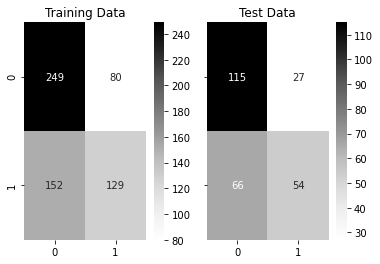

In [472]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

### Training Data and Test Data Classification Report Comparison:

In [473]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.62      0.76      0.68       329
           1       0.62      0.46      0.53       281

    accuracy                           0.62       610
   macro avg       0.62      0.61      0.60       610
weighted avg       0.62      0.62      0.61       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.64      0.81      0.71       142
           1       0.67      0.45      0.54       120

    accuracy                           0.65       262
   macro avg       0.65      0.63      0.62       262
weighted avg       0.65      0.65      0.63       262
 



### AUC and ROC for the train and test data:

In [474]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

AUC for the Training Data: 0.657
AUC for the Test Data: 0.665


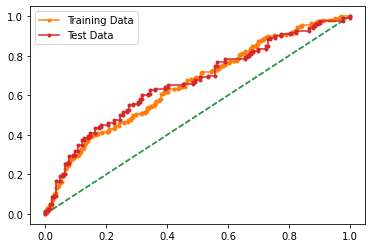

In [475]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### Changing Custom cut-off values to improve accuracy:

0.1 

Accuracy Score 0.4607
F1 Score 0.6308 

Confusion Matrix


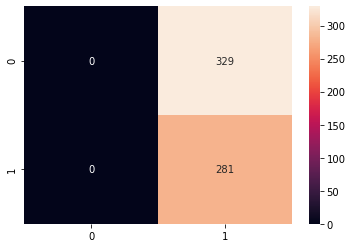

0.2 

Accuracy Score 0.4639
F1 Score 0.6322 

Confusion Matrix


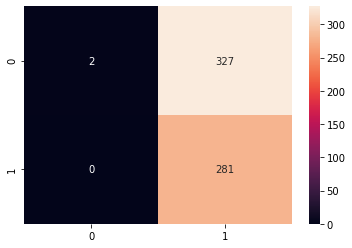

0.3 

Accuracy Score 0.5279
F1 Score 0.6479 

Confusion Matrix


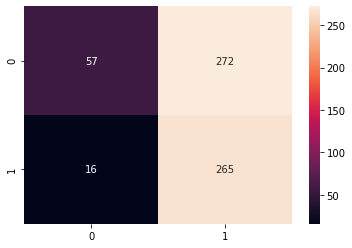

0.4 

Accuracy Score 0.5951
F1 Score 0.6023 

Confusion Matrix


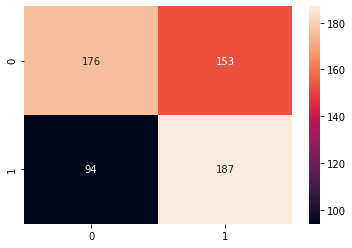

0.5 

Accuracy Score 0.6197
F1 Score 0.5265 

Confusion Matrix


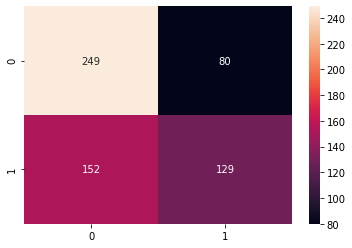

0.6 

Accuracy Score 0.6295
F1 Score 0.4619 

Confusion Matrix


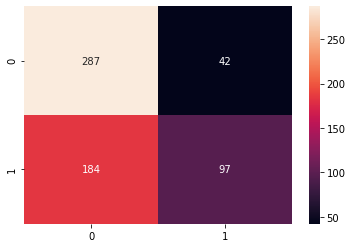

0.7 

Accuracy Score 0.5754
F1 Score 0.2031 

Confusion Matrix


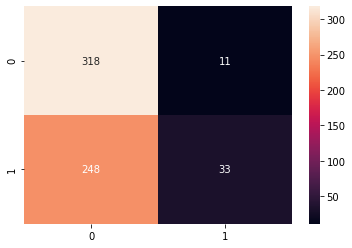

0.8 

Accuracy Score 0.5426
F1 Score 0.0141 

Confusion Matrix


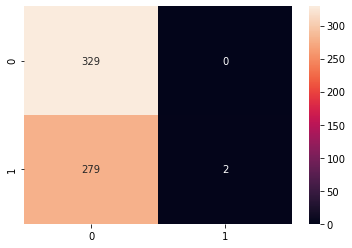

0.9 

Accuracy Score 0.5393
F1 Score 0.0 

Confusion Matrix


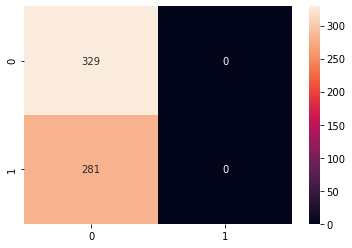

In [476]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

In [477]:
# Taking the cut-off value as 0.4 as both the accuracy and F1 score is 60%:
#Predicting the classes on the test data

data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_test[:,1])):
    if np.array(pred_prob_test[:,1])[i]>0.4:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

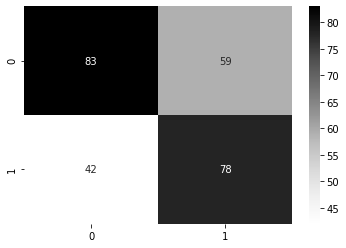

In [478]:
sns.heatmap((metrics.confusion_matrix(y_test,data_pred_custom_cutoff)),annot=True,fmt='.5g',cmap='Greys');

In [479]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n\n\n')
print('Classification Report of the custom cut-off test data:\n\n',metrics.classification_report(y_test,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

           0       0.64      0.81      0.71       142
           1       0.67      0.45      0.54       120

    accuracy                           0.65       262
   macro avg       0.65      0.63      0.62       262
weighted avg       0.65      0.65      0.63       262
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

           0       0.66      0.58      0.62       142
           1       0.57      0.65      0.61       120

    accuracy                           0.61       262
   macro avg       0.62      0.62      0.61       262
weighted avg       0.62      0.61      0.61       262
 

